In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten, Activation, PReLU
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.activations import linear, relu

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
%%time
cat = [f'col_{i}' for i in range(1, 117)]
con = [f'col_{i}' for i in range(117, 131)]
for c in cat:
    train_df[c] = train_df[c].astype('category')
    test_df[c] = test_df[c].astype('category')
    train_df[c] = train_df[c].cat.codes
    test_df[c] = test_df[c].cat.codes
del c
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

Wall time: 9.76 s


In [4]:
X = train_df.iloc[:,train_df.columns != 'target'].values
y = train_df.iloc[:,train_df.columns == 'target'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
del X, y

In [6]:
activation_fn = 'relu'
model = Sequential()
# Input Layer
model.add(Input(shape=(130,)))

# First Hidden Layer
model.add(Dense(260, activation=activation_fn))
model.add(Dropout(.3))

# Second Hidden Layer
model.add(Dense(520, activation=activation_fn))
model.add(Dropout(.4))

# Third Hidden Layer
model.add(Dense(260, activation=activation_fn))
model.add(Dropout(.3))

# Fourth Hidden Layer
model.add(Dense(130, activation=activation_fn))
model.add(Dropout(.2))

# Firth Hidden Layer
model.add(Dense(65, activation=activation_fn))
model.add(Dropout(.1))

# Sixth Hidden Layer
model.add(Dense(32, activation=activation_fn))

# Output Layer
model.add(Dense(1, activation=linear))
model.compile(optimizer=RMSprop(learning_rate=1e-3), loss=MeanSquaredError(), metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 260)               34060     
_________________________________________________________________
dropout (Dropout)            (None, 260)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 520)               135720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 520)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 260)               135460    
_________________________________________________________________
dropout_2 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 130)               3

In [7]:
mse_history = []
mae_history = []

In [8]:
%%time
init_epochs = 0
epochs_now = 100
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'relu_linear_6/model_{epochs_now}.h5')

Epoch 1/100
2980/2980 [==============================] - 22s 7ms/step - loss: 5956222.5000 - mse: 5956222.5000 - mae: 1531.5386 - val_loss: 5801152.5000 - val_mse: 5801152.5000 - val_mae: 1419.1067
Epoch 2/100
2980/2980 [==============================] - 22s 7ms/step - loss: 5178345.0000 - mse: 5178345.0000 - mae: 1410.7272 - val_loss: 4509687.0000 - val_mse: 4509687.0000 - val_mae: 1269.6991
Epoch 3/100
2980/2980 [==============================] - 28s 9ms/step - loss: 5071676.5000 - mse: 5071676.5000 - mae: 1395.2234 - val_loss: 4114221.7500 - val_mse: 4114221.7500 - val_mae: 1335.0708
Epoch 4/100
2980/2980 [==============================] - 18s 6ms/step - loss: 5040193.5000 - mse: 5040193.5000 - mae: 1388.3733 - val_loss: 4238910.0000 - val_mse: 4238910.0000 - val_mae: 1259.4462
Epoch 5/100
2980/2980 [==============================] - 18s 6ms/step - loss: 4943599.5000 - mse: 4943599.5000 - mae: 1371.8440 - val_loss: 5911537.0000 - val_mse: 5911537.0000 - val_mae: 1786.7345
Epoch 6/10

2980/2980 [==============================] - 19s 6ms/step - loss: 4833700.5000 - mse: 4833700.5000 - mae: 1361.4705 - val_loss: 4026921.0000 - val_mse: 4026921.0000 - val_mae: 1275.2469
Epoch 43/100
2980/2980 [==============================] - 21s 7ms/step - loss: 4740359.0000 - mse: 4740359.0000 - mae: 1358.5602 - val_loss: 4200600.5000 - val_mse: 4200600.5000 - val_mae: 1436.7325
Epoch 44/100
2980/2980 [==============================] - 20s 7ms/step - loss: 4829784.5000 - mse: 4829784.5000 - mae: 1365.8002 - val_loss: 4031304.2500 - val_mse: 4031304.2500 - val_mae: 1326.7053
Epoch 45/100
2980/2980 [==============================] - 23s 8ms/step - loss: 4766520.0000 - mse: 4766520.0000 - mae: 1359.6530 - val_loss: 4055953.7500 - val_mse: 4055953.7500 - val_mae: 1339.5143
Epoch 46/100
2980/2980 [==============================] - 23s 8ms/step - loss: 4774126.5000 - mse: 4774126.5000 - mae: 1355.2256 - val_loss: 4052825.7500 - val_mse: 4052825.7500 - val_mae: 1311.0438
Epoch 47/100
2980/

2980/2980 [==============================] - 306s 103ms/step - loss: 5940214.5000 - mse: 5940214.5000 - mae: 1350.4452 - val_loss: 4276775.0000 - val_mse: 4276775.0000 - val_mae: 1364.1213
Epoch 84/100
2980/2980 [==============================] - 14s 5ms/step - loss: 4771897.5000 - mse: 4771897.5000 - mae: 1356.1959 - val_loss: 4355779.5000 - val_mse: 4355779.5000 - val_mae: 1498.7136
Epoch 85/100
2980/2980 [==============================] - 11s 4ms/step - loss: 4658870.5000 - mse: 4658870.5000 - mae: 1349.7668 - val_loss: 3967283.7500 - val_mse: 3967283.7500 - val_mae: 1267.5707
Epoch 86/100
2980/2980 [==============================] - 10s 3ms/step - loss: 4637816.5000 - mse: 4637816.5000 - mae: 1342.3295 - val_loss: 4165893.5000 - val_mse: 4165893.5000 - val_mae: 1410.5414
Epoch 87/100
2980/2980 [==============================] - 10s 3ms/step - loss: 4649700.5000 - mse: 4649700.5000 - mae: 1343.0328 - val_loss: 4146737.0000 - val_mse: 4146737.0000 - val_mae: 1364.6862
Epoch 88/100
29

In [9]:
%%time
init_epochs = 100
epochs_now = 500
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'relu_linear_6/model_{epochs_now}.h5')

Epoch 101/500
2980/2980 [==============================] - 22s 7ms/step - loss: 4701498.5000 - mse: 4701498.5000 - mae: 1342.7797 - val_loss: 3955369.5000 - val_mse: 3955369.5000 - val_mae: 1329.0306
Epoch 102/500
2980/2980 [==============================] - 21s 7ms/step - loss: 4781446.5000 - mse: 4781446.5000 - mae: 1404.9426 - val_loss: 4332983.5000 - val_mse: 4332983.5000 - val_mae: 1398.1360
Epoch 103/500
2980/2980 [==============================] - 22s 7ms/step - loss: 4643235.5000 - mse: 4643235.5000 - mae: 1344.1274 - val_loss: 4104968.7500 - val_mse: 4104968.7500 - val_mae: 1318.6069
Epoch 104/500
2980/2980 [==============================] - 25s 8ms/step - loss: 4724837.5000 - mse: 4724837.5000 - mae: 1347.6094 - val_loss: 4104290.5000 - val_mse: 4104290.5000 - val_mae: 1324.0704
Epoch 105/500
2980/2980 [==============================] - 24s 8ms/step - loss: 4652900.5000 - mse: 4652900.5000 - mae: 1341.8131 - val_loss: 4018978.0000 - val_mse: 4018978.0000 - val_mae: 1259.1400


2980/2980 [==============================] - 20s 7ms/step - loss: 4652869.0000 - mse: 4652869.0000 - mae: 1343.0031 - val_loss: 4085326.7500 - val_mse: 4085326.7500 - val_mae: 1311.0277
Epoch 142/500
2980/2980 [==============================] - 21s 7ms/step - loss: 4698099.0000 - mse: 4698099.0000 - mae: 1346.7251 - val_loss: 4016555.2500 - val_mse: 4016555.2500 - val_mae: 1338.1407
Epoch 143/500
2980/2980 [==============================] - 21s 7ms/step - loss: 4639429.0000 - mse: 4639429.0000 - mae: 1344.4053 - val_loss: 3969064.2500 - val_mse: 3969064.2500 - val_mae: 1302.5658
Epoch 144/500
2980/2980 [==============================] - 23s 8ms/step - loss: 4693966.0000 - mse: 4693966.0000 - mae: 1345.7957 - val_loss: 4040369.5000 - val_mse: 4040369.5000 - val_mae: 1319.6177
Epoch 145/500
2980/2980 [==============================] - 22s 8ms/step - loss: 4802333.0000 - mse: 4802333.0000 - mae: 1351.5746 - val_loss: 3916709.5000 - val_mse: 3916709.5000 - val_mae: 1265.0254
Epoch 146/500


2980/2980 [==============================] - 34s 12ms/step - loss: 4600016.0000 - mse: 4600016.0000 - mae: 1323.2642 - val_loss: 4111853.2500 - val_mse: 4111853.2500 - val_mae: 1378.0294
Epoch 182/500
2980/2980 [==============================] - 34s 11ms/step - loss: 4678407.0000 - mse: 4678407.0000 - mae: 1329.9779 - val_loss: 4628045.0000 - val_mse: 4628045.0000 - val_mae: 1529.5160
Epoch 183/500
2980/2980 [==============================] - 33s 11ms/step - loss: 4746025.0000 - mse: 4746025.0000 - mae: 1333.1799 - val_loss: 4037597.5000 - val_mse: 4037597.5000 - val_mae: 1273.0890
Epoch 184/500
2980/2980 [==============================] - 36s 12ms/step - loss: 4680424.0000 - mse: 4680424.0000 - mae: 1331.1559 - val_loss: 4372713.5000 - val_mse: 4372713.5000 - val_mae: 1393.2472
Epoch 185/500
2980/2980 [==============================] - 36s 12ms/step - loss: 4698919.5000 - mse: 4698919.5000 - mae: 1338.5112 - val_loss: 3960436.5000 - val_mse: 3960436.5000 - val_mae: 1349.3264
Epoch 186

2980/2980 [==============================] - 36s 12ms/step - loss: 4619142.0000 - mse: 4619142.0000 - mae: 1331.1248 - val_loss: 4066522.7500 - val_mse: 4066522.7500 - val_mae: 1391.5961
Epoch 222/500
2980/2980 [==============================] - 34s 11ms/step - loss: 4630163.5000 - mse: 4630163.5000 - mae: 1330.4860 - val_loss: 4168718.7500 - val_mse: 4168718.7500 - val_mae: 1448.1073
Epoch 223/500
2980/2980 [==============================] - 33s 11ms/step - loss: 4546380.5000 - mse: 4546380.5000 - mae: 1324.7703 - val_loss: 4647570.5000 - val_mse: 4647570.5000 - val_mae: 1434.6143
Epoch 224/500
2980/2980 [==============================] - 27s 9ms/step - loss: 4578137.5000 - mse: 4578137.5000 - mae: 1324.0237 - val_loss: 4149793.2500 - val_mse: 4149793.2500 - val_mae: 1400.4607
Epoch 225/500
2980/2980 [==============================] - 21s 7ms/step - loss: 4466644.5000 - mse: 4466644.5000 - mae: 1315.5259 - val_loss: 3970153.5000 - val_mse: 3970153.5000 - val_mae: 1297.1774
Epoch 226/5

2980/2980 [==============================] - 12s 4ms/step - loss: 4782247.0000 - mse: 4782247.0000 - mae: 1326.8251 - val_loss: 4149272.0000 - val_mse: 4149272.0000 - val_mae: 1395.5259
Epoch 263/500
2980/2980 [==============================] - 15s 5ms/step - loss: 4562437.0000 - mse: 4562437.0000 - mae: 1319.2473 - val_loss: 3851167.0000 - val_mse: 3851167.0000 - val_mae: 1260.5266
Epoch 264/500
2980/2980 [==============================] - 16s 6ms/step - loss: 4486646.0000 - mse: 4486646.0000 - mae: 1314.2915 - val_loss: 4032420.7500 - val_mse: 4032420.7500 - val_mae: 1374.9286
Epoch 265/500
2980/2980 [==============================] - 17s 6ms/step - loss: 4525304.0000 - mse: 4525304.0000 - mae: 1318.0226 - val_loss: 4084455.2500 - val_mse: 4084455.2500 - val_mae: 1348.9384
Epoch 266/500
2980/2980 [==============================] - 15s 5ms/step - loss: 4493318.0000 - mse: 4493318.0000 - mae: 1312.7352 - val_loss: 4117755.7500 - val_mse: 4117755.7500 - val_mae: 1327.0957
Epoch 267/500


2980/2980 [==============================] - 15s 5ms/step - loss: 4515585.5000 - mse: 4515585.5000 - mae: 1319.7043 - val_loss: 4404860.5000 - val_mse: 4404860.5000 - val_mae: 1440.1738
Epoch 304/500
2980/2980 [==============================] - 15s 5ms/step - loss: 4537615.0000 - mse: 4537615.0000 - mae: 1322.7799 - val_loss: 4052363.0000 - val_mse: 4052363.0000 - val_mae: 1226.6365
Epoch 305/500
2980/2980 [==============================] - 15s 5ms/step - loss: 4531793.5000 - mse: 4531793.5000 - mae: 1321.7413 - val_loss: 4041372.5000 - val_mse: 4041372.5000 - val_mae: 1269.1837
Epoch 306/500
2980/2980 [==============================] - 15s 5ms/step - loss: 4584358.0000 - mse: 4584358.0000 - mae: 1324.3350 - val_loss: 3827341.5000 - val_mse: 3827341.5000 - val_mae: 1273.3010
Epoch 307/500
2980/2980 [==============================] - 14s 5ms/step - loss: 4590827.0000 - mse: 4590827.0000 - mae: 1327.4352 - val_loss: 3979240.2500 - val_mse: 3979240.2500 - val_mae: 1342.0637
Epoch 308/500


2980/2980 [==============================] - 14s 5ms/step - loss: 4495912.5000 - mse: 4495912.5000 - mae: 1323.2546 - val_loss: 3983583.2500 - val_mse: 3983583.2500 - val_mae: 1373.8738
Epoch 345/500
2980/2980 [==============================] - 14s 5ms/step - loss: 4512060.0000 - mse: 4512060.0000 - mae: 1320.8715 - val_loss: 4285015.0000 - val_mse: 4285015.0000 - val_mae: 1427.5980
Epoch 346/500
2980/2980 [==============================] - 14s 5ms/step - loss: 4536095.5000 - mse: 4536095.5000 - mae: 1321.0914 - val_loss: 4286504.0000 - val_mse: 4286504.0000 - val_mae: 1475.1167
Epoch 347/500
2980/2980 [==============================] - 14s 5ms/step - loss: 4620657.5000 - mse: 4620657.5000 - mae: 1324.6017 - val_loss: 3953339.5000 - val_mse: 3953339.5000 - val_mae: 1305.2070
Epoch 348/500
2980/2980 [==============================] - 14s 5ms/step - loss: 4642367.0000 - mse: 4642367.0000 - mae: 1320.9886 - val_loss: 4010512.2500 - val_mse: 4010512.2500 - val_mae: 1354.9127
Epoch 349/500


2980/2980 [==============================] - 11s 4ms/step - loss: 4538363.0000 - mse: 4538363.0000 - mae: 1311.9497 - val_loss: 3885585.5000 - val_mse: 3885585.5000 - val_mae: 1241.6149
Epoch 386/500
2980/2980 [==============================] - 16s 5ms/step - loss: 4610051.0000 - mse: 4610051.0000 - mae: 1315.6687 - val_loss: 3924143.2500 - val_mse: 3924143.2500 - val_mae: 1306.7036
Epoch 387/500
2980/2980 [==============================] - 14s 5ms/step - loss: 4546951.5000 - mse: 4546951.5000 - mae: 1317.1270 - val_loss: 4014417.5000 - val_mse: 4014417.5000 - val_mae: 1317.5850
Epoch 388/500
2980/2980 [==============================] - 15s 5ms/step - loss: 4518412.0000 - mse: 4518412.0000 - mae: 1313.4918 - val_loss: 3874393.7500 - val_mse: 3874393.7500 - val_mae: 1245.5769
Epoch 389/500
2980/2980 [==============================] - 16s 5ms/step - loss: 4528496.5000 - mse: 4528496.5000 - mae: 1308.1045 - val_loss: 3929098.2500 - val_mse: 3929098.2500 - val_mae: 1300.1714
Epoch 390/500


2980/2980 [==============================] - 13s 4ms/step - loss: 4589642.5000 - mse: 4589642.5000 - mae: 1322.0348 - val_loss: 4117450.2500 - val_mse: 4117450.2500 - val_mae: 1363.0370
Epoch 427/500
2980/2980 [==============================] - 13s 4ms/step - loss: 4686949.5000 - mse: 4686949.5000 - mae: 1320.3242 - val_loss: 3868394.5000 - val_mse: 3868394.5000 - val_mae: 1233.5417
Epoch 428/500
2980/2980 [==============================] - 12s 4ms/step - loss: 4534674.5000 - mse: 4534674.5000 - mae: 1316.1648 - val_loss: 3912366.5000 - val_mse: 3912366.5000 - val_mae: 1287.1387
Epoch 429/500
2980/2980 [==============================] - 17s 6ms/step - loss: 4817962.0000 - mse: 4817962.0000 - mae: 1314.4518 - val_loss: 3894019.0000 - val_mse: 3894019.0000 - val_mae: 1273.8073
Epoch 430/500
2980/2980 [==============================] - 16s 6ms/step - loss: 4622127.5000 - mse: 4622127.5000 - mae: 1317.0443 - val_loss: 3957937.5000 - val_mse: 3957937.5000 - val_mae: 1308.9440
Epoch 431/500


2980/2980 [==============================] - 11s 4ms/step - loss: 4576945.5000 - mse: 4576945.5000 - mae: 1327.0809 - val_loss: 3974069.5000 - val_mse: 3974069.5000 - val_mae: 1315.6771
Epoch 468/500
2980/2980 [==============================] - 9s 3ms/step - loss: 4616231.0000 - mse: 4616231.0000 - mae: 1327.8425 - val_loss: 3972751.7500 - val_mse: 3972751.7500 - val_mae: 1320.0159
Epoch 469/500
2980/2980 [==============================] - 9s 3ms/step - loss: 4623223.0000 - mse: 4623223.0000 - mae: 1329.0419 - val_loss: 4178417.5000 - val_mse: 4178417.5000 - val_mae: 1425.3298
Epoch 470/500
2980/2980 [==============================] - 9s 3ms/step - loss: 4668721.0000 - mse: 4668721.0000 - mae: 1332.6516 - val_loss: 3979617.5000 - val_mse: 3979617.5000 - val_mae: 1342.5706
Epoch 471/500
2980/2980 [==============================] - 12s 4ms/step - loss: 4653371.0000 - mse: 4653371.0000 - mae: 1333.0021 - val_loss: 4097146.0000 - val_mse: 4097146.0000 - val_mae: 1411.8525
Epoch 472/500
298

In [10]:
%%time
init_epochs = 500
epochs_now = 1000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'relu_linear_6/model_{epochs_now}.h5')

Epoch 501/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 4665988.0000 - mse: 4665988.0000 - mae: 1336.2806 - val_loss: 3963781.2500 - val_mse: 3963781.2500 - val_mae: 1284.8362
Epoch 502/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 5137765.0000 - mse: 5137765.0000 - mae: 1337.4628 - val_loss: 4227962.0000 - val_mse: 4227962.0000 - val_mae: 1447.6891
Epoch 503/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 4604927.0000 - mse: 4604927.0000 - mae: 1330.6434 - val_loss: 4020679.2500 - val_mse: 4020679.2500 - val_mae: 1245.9572
Epoch 504/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 4726160.0000 - mse: 4726160.0000 - mae: 1334.5209 - val_loss: 4261427.0000 - val_mse: 4261427.0000 - val_mae: 1449.3920
Epoch 505/1000
2980/2980 [==============================] - 13s 4ms/step - loss: 4641180.5000 - mse: 4641180.5000 - mae: 1334.3088 - val_loss: 4220048.0000 - val_mse: 4220048.0000 - val_mae: 1448.

2980/2980 [==============================] - 11s 4ms/step - loss: 4947908.0000 - mse: 4947908.0000 - mae: 1325.7705 - val_loss: 4139889.2500 - val_mse: 4139889.2500 - val_mae: 1418.2666
Epoch 541/1000
2980/2980 [==============================] - 13s 4ms/step - loss: 4583861.0000 - mse: 4583861.0000 - mae: 1324.7169 - val_loss: 4039661.2500 - val_mse: 4039661.2500 - val_mae: 1383.8029
Epoch 542/1000
2980/2980 [==============================] - 13s 4ms/step - loss: 4517862.5000 - mse: 4517862.5000 - mae: 1321.0509 - val_loss: 3991070.0000 - val_mse: 3991070.0000 - val_mae: 1343.8213
Epoch 543/1000
2980/2980 [==============================] - 11s 4ms/step - loss: 4496930.0000 - mse: 4496930.0000 - mae: 1325.3615 - val_loss: 3891917.2500 - val_mse: 3891917.2500 - val_mae: 1280.8574
Epoch 544/1000
2980/2980 [==============================] - 11s 4ms/step - loss: 5433784.5000 - mse: 5433784.5000 - mae: 1326.0466 - val_loss: 3950074.5000 - val_mse: 3950074.5000 - val_mae: 1316.8827
Epoch 545/

Epoch 581/1000
2980/2980 [==============================] - 11s 4ms/step - loss: 4627124.0000 - mse: 4627124.0000 - mae: 1334.3135 - val_loss: 4280718.0000 - val_mse: 4280718.0000 - val_mae: 1464.8741
Epoch 582/1000
2980/2980 [==============================] - 13s 4ms/step - loss: 4645943.5000 - mse: 4645943.5000 - mae: 1333.7085 - val_loss: 4102441.7500 - val_mse: 4102441.7500 - val_mae: 1374.3219
Epoch 583/1000
2980/2980 [==============================] - 13s 4ms/step - loss: 4552016.5000 - mse: 4552016.5000 - mae: 1329.2172 - val_loss: 4040302.2500 - val_mse: 4040302.2500 - val_mae: 1339.1097
Epoch 584/1000
2980/2980 [==============================] - 15s 5ms/step - loss: 4583628.0000 - mse: 4583628.0000 - mae: 1328.3794 - val_loss: 4021716.0000 - val_mse: 4021716.0000 - val_mae: 1330.5839
Epoch 585/1000
2980/2980 [==============================] - 15s 5ms/step - loss: 4494010.0000 - mse: 4494010.0000 - mae: 1326.1399 - val_loss: 4428358.0000 - val_mse: 4428358.0000 - val_mae: 1539.

2980/2980 [==============================] - 14s 5ms/step - loss: 6458594.5000 - mse: 6458594.5000 - mae: 1323.2151 - val_loss: 3886195.7500 - val_mse: 3886195.7500 - val_mae: 1254.5656
Epoch 622/1000
2980/2980 [==============================] - 14s 5ms/step - loss: 4603606.5000 - mse: 4603606.5000 - mae: 1313.6504 - val_loss: 4677739.5000 - val_mse: 4677739.5000 - val_mae: 1608.0145
Epoch 623/1000
2980/2980 [==============================] - 16s 5ms/step - loss: 8807993.0000 - mse: 8807993.0000 - mae: 1323.8756 - val_loss: 4069904.2500 - val_mse: 4069904.2500 - val_mae: 1351.8046
Epoch 624/1000
2980/2980 [==============================] - 16s 5ms/step - loss: 17669024.0000 - mse: 17669024.0000 - mae: 1330.7544 - val_loss: 3953177.5000 - val_mse: 3953177.5000 - val_mae: 1311.7113
Epoch 625/1000
2980/2980 [==============================] - 12s 4ms/step - loss: 4561507.5000 - mse: 4561507.5000 - mae: 1314.9951 - val_loss: 3851124.7500 - val_mse: 3851124.7500 - val_mae: 1256.8132
Epoch 62

Epoch 662/1000
2980/2980 [==============================] - 12s 4ms/step - loss: 4613921.5000 - mse: 4613921.5000 - mae: 1329.2777 - val_loss: 4193018.2500 - val_mse: 4193018.2500 - val_mae: 1458.3698
Epoch 663/1000
2980/2980 [==============================] - 16s 5ms/step - loss: 4648455.0000 - mse: 4648455.0000 - mae: 1327.6731 - val_loss: 3871645.7500 - val_mse: 3871645.7500 - val_mae: 1243.2279
Epoch 664/1000
2980/2980 [==============================] - 20s 7ms/step - loss: 5170155.0000 - mse: 5170155.0000 - mae: 1335.2061 - val_loss: 3996353.0000 - val_mse: 3996353.0000 - val_mae: 1267.3567
Epoch 665/1000
2980/2980 [==============================] - 18s 6ms/step - loss: 4640504.5000 - mse: 4640504.5000 - mae: 1327.8868 - val_loss: 4476454.5000 - val_mse: 4476454.5000 - val_mae: 1544.5721
Epoch 666/1000
2980/2980 [==============================] - 16s 5ms/step - loss: 4606574.5000 - mse: 4606574.5000 - mae: 1335.2343 - val_loss: 4010362.0000 - val_mse: 4010362.0000 - val_mae: 1255.

Epoch 703/1000
2980/2980 [==============================] - 11s 4ms/step - loss: 4609230.5000 - mse: 4609230.5000 - mae: 1331.2512 - val_loss: 3959438.7500 - val_mse: 3959438.7500 - val_mae: 1284.8365
Epoch 704/1000
2980/2980 [==============================] - 10s 4ms/step - loss: 4542701.5000 - mse: 4542701.5000 - mae: 1328.4824 - val_loss: 4464800.0000 - val_mse: 4464800.0000 - val_mae: 1522.6722
Epoch 705/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 4692997.5000 - mse: 4692997.5000 - mae: 1336.3579 - val_loss: 3961583.2500 - val_mse: 3961583.2500 - val_mae: 1345.2472
Epoch 706/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 4682100.0000 - mse: 4682100.0000 - mae: 1338.0088 - val_loss: 4315167.5000 - val_mse: 4315167.5000 - val_mae: 1473.1545
Epoch 707/1000
2980/2980 [==============================] - 13s 4ms/step - loss: 4698842.0000 - mse: 4698842.0000 - mae: 1334.2197 - val_loss: 4130981.0000 - val_mse: 4130981.0000 - val_mae: 1378.

Epoch 744/1000
2980/2980 [==============================] - 17s 6ms/step - loss: 4704561.0000 - mse: 4704561.0000 - mae: 1349.4680 - val_loss: 4075618.0000 - val_mse: 4075618.0000 - val_mae: 1353.8967
Epoch 745/1000
2980/2980 [==============================] - 14s 5ms/step - loss: 4819214.5000 - mse: 4819214.5000 - mae: 1357.2635 - val_loss: 4331208.5000 - val_mse: 4331208.5000 - val_mae: 1443.5928
Epoch 746/1000
2980/2980 [==============================] - 12s 4ms/step - loss: 4791404.5000 - mse: 4791404.5000 - mae: 1364.5089 - val_loss: 4136660.2500 - val_mse: 4136660.2500 - val_mae: 1396.6421
Epoch 747/1000
2980/2980 [==============================] - 15s 5ms/step - loss: 5191019.5000 - mse: 5191019.5000 - mae: 1366.5742 - val_loss: 4001016.7500 - val_mse: 4001016.7500 - val_mae: 1332.3057
Epoch 748/1000
2980/2980 [==============================] - 16s 5ms/step - loss: 5557928.5000 - mse: 5557928.5000 - mae: 1354.1655 - val_loss: 3939545.5000 - val_mse: 3939545.5000 - val_mae: 1318.

Epoch 785/1000
2980/2980 [==============================] - 20s 7ms/step - loss: 4706525.5000 - mse: 4706525.5000 - mae: 1349.7926 - val_loss: 3985178.0000 - val_mse: 3985178.0000 - val_mae: 1326.4142
Epoch 786/1000
2980/2980 [==============================] - 17s 6ms/step - loss: 4766464.5000 - mse: 4766464.5000 - mae: 1359.7174 - val_loss: 4384544.5000 - val_mse: 4384544.5000 - val_mae: 1278.9960
Epoch 787/1000
2980/2980 [==============================] - 14s 5ms/step - loss: 4792159.0000 - mse: 4792159.0000 - mae: 1368.5253 - val_loss: 4028365.2500 - val_mse: 4028365.2500 - val_mae: 1275.5177
Epoch 788/1000
2980/2980 [==============================] - 15s 5ms/step - loss: 4788237.5000 - mse: 4788237.5000 - mae: 1363.0657 - val_loss: 4155748.7500 - val_mse: 4155748.7500 - val_mae: 1371.6895
Epoch 789/1000
2980/2980 [==============================] - 13s 4ms/step - loss: 4851914.5000 - mse: 4851914.5000 - mae: 1367.0621 - val_loss: 4090463.0000 - val_mse: 4090463.0000 - val_mae: 1358.

Epoch 826/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 5012123.0000 - mse: 5012123.0000 - mae: 1363.7809 - val_loss: 4334273.5000 - val_mse: 4334273.5000 - val_mae: 1429.2125
Epoch 827/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4714799.0000 - mse: 4714799.0000 - mae: 1349.8583 - val_loss: 3948176.2500 - val_mse: 3948176.2500 - val_mae: 1281.0485
Epoch 828/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4814222.0000 - mse: 4814222.0000 - mae: 1350.0994 - val_loss: 3921096.5000 - val_mse: 3921096.5000 - val_mae: 1276.9174
Epoch 829/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 5134284.0000 - mse: 5134284.0000 - mae: 1350.2758 - val_loss: 3916177.5000 - val_mse: 3916177.5000 - val_mae: 1288.5941
Epoch 830/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4645159.5000 - mse: 4645159.5000 - mae: 1338.3710 - val_loss: 4653628.0000 - val_mse: 4653628.0000 - val_mae: 1618.2905


Epoch 867/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4748210.5000 - mse: 4748210.5000 - mae: 1344.9003 - val_loss: 4254221.0000 - val_mse: 4254221.0000 - val_mae: 1411.0044
Epoch 868/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4830927.0000 - mse: 4830927.0000 - mae: 1342.9485 - val_loss: 4028834.5000 - val_mse: 4028834.5000 - val_mae: 1259.8632
Epoch 869/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 16416510.0000 - mse: 16416510.0000 - mae: 1356.8651 - val_loss: 3898985.5000 - val_mse: 3898985.5000 - val_mae: 1242.8169
Epoch 870/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 8500716.0000 - mse: 8500716.0000 - mae: 1349.2167 - val_loss: 4071046.5000 - val_mse: 4071046.5000 - val_mae: 1343.1072
Epoch 871/1000
2980/2980 [==============================] - 10s 3ms/step - loss: 32902012.0000 - mse: 32902012.0000 - mae: 1375.0106 - val_loss: 4089975.7500 - val_mse: 4089975.7500 - val_mae: 140

Epoch 908/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4627544.0000 - mse: 4627544.0000 - mae: 1337.9756 - val_loss: 3998932.5000 - val_mse: 3998932.5000 - val_mae: 1263.2977
Epoch 909/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4594513.5000 - mse: 4594513.5000 - mae: 1330.8929 - val_loss: 3940031.2500 - val_mse: 3940031.2500 - val_mae: 1237.7933
Epoch 910/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4579418.0000 - mse: 4579418.0000 - mae: 1331.5326 - val_loss: 4723382.5000 - val_mse: 4723382.5000 - val_mae: 1656.0756
Epoch 911/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4567210.5000 - mse: 4567210.5000 - mae: 1330.1259 - val_loss: 3950648.2500 - val_mse: 3950648.2500 - val_mae: 1265.6962
Epoch 912/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4526498.5000 - mse: 4526498.5000 - mae: 1329.1315 - val_loss: 4207354.0000 - val_mse: 4207354.0000 - val_mae: 1450.5717


Epoch 949/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4663908.5000 - mse: 4663908.5000 - mae: 1340.3730 - val_loss: 4009025.5000 - val_mse: 4009025.5000 - val_mae: 1240.2805
Epoch 950/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4667357.5000 - mse: 4667357.5000 - mae: 1341.6793 - val_loss: 3941848.5000 - val_mse: 3941848.5000 - val_mae: 1332.6191
Epoch 951/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4714752.0000 - mse: 4714752.0000 - mae: 1344.2744 - val_loss: 4490756.5000 - val_mse: 4490756.5000 - val_mae: 1578.7639
Epoch 952/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4714234.5000 - mse: 4714234.5000 - mae: 1345.5201 - val_loss: 4250088.0000 - val_mse: 4250088.0000 - val_mae: 1280.5409
Epoch 953/1000
2980/2980 [==============================] - 8s 3ms/step - loss: 4771162.5000 - mse: 4771162.5000 - mae: 1363.6226 - val_loss: 4039792.5000 - val_mse: 4039792.5000 - val_mae: 1267.4218


Epoch 990/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4715220.0000 - mse: 4715220.0000 - mae: 1349.5559 - val_loss: 3991700.0000 - val_mse: 3991700.0000 - val_mae: 1309.2238
Epoch 991/1000
2980/2980 [==============================] - 8s 3ms/step - loss: 4754326.0000 - mse: 4754326.0000 - mae: 1350.8444 - val_loss: 3896304.5000 - val_mse: 3896304.5000 - val_mae: 1261.2064
Epoch 992/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4719061.0000 - mse: 4719061.0000 - mae: 1349.7131 - val_loss: 4007879.0000 - val_mse: 4007879.0000 - val_mae: 1247.0884
Epoch 993/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4663359.0000 - mse: 4663359.0000 - mae: 1346.9515 - val_loss: 3952970.5000 - val_mse: 3952970.5000 - val_mae: 1266.0128
Epoch 994/1000
2980/2980 [==============================] - 9s 3ms/step - loss: 4668233.0000 - mse: 4668233.0000 - mae: 1342.3341 - val_loss: 4169489.0000 - val_mse: 4169489.0000 - val_mae: 1406.9438


In [11]:
%%time
init_epochs = 1000
epochs_now = 5000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'relu_linear_6/model_{epochs_now}.h5')

Epoch 1001/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4736403.5000 - mse: 4736403.5000 - mae: 1350.2184 - val_loss: 4005961.2500 - val_mse: 4005961.2500 - val_mae: 1252.4774
Epoch 1002/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4738085.5000 - mse: 4738085.5000 - mae: 1347.6340 - val_loss: 4184522.7500 - val_mse: 4184522.7500 - val_mae: 1421.7451
Epoch 1003/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4748070.0000 - mse: 4748070.0000 - mae: 1352.8907 - val_loss: 4006188.2500 - val_mse: 4006188.2500 - val_mae: 1318.2599
Epoch 1004/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4741695.0000 - mse: 4741695.0000 - mae: 1357.7299 - val_loss: 4246840.5000 - val_mse: 4246840.5000 - val_mae: 1486.0878
Epoch 1005/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4692208.0000 - mse: 4692208.0000 - mae: 1340.6030 - val_loss: 4132233.2500 - val_mse: 4132233.2500 - val_mae: 1411

Epoch 1042/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4790104.0000 - mse: 4790104.0000 - mae: 1365.4912 - val_loss: 3954446.5000 - val_mse: 3954446.5000 - val_mae: 1260.3640
Epoch 1043/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4688698.5000 - mse: 4688698.5000 - mae: 1354.5946 - val_loss: 3925446.7500 - val_mse: 3925446.7500 - val_mae: 1253.2107
Epoch 1044/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4736118.5000 - mse: 4736118.5000 - mae: 1359.2422 - val_loss: 4031131.2500 - val_mse: 4031131.2500 - val_mae: 1260.1229
Epoch 1045/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4725230.5000 - mse: 4725230.5000 - mae: 1355.7117 - val_loss: 4002736.7500 - val_mse: 4002736.7500 - val_mae: 1252.0800
Epoch 1046/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4903732.0000 - mse: 4903732.0000 - mae: 1376.6914 - val_loss: 4011492.2500 - val_mse: 4011492.2500 - val_mae: 1312.

Epoch 1083/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4624591.0000 - mse: 4624591.0000 - mae: 1346.3151 - val_loss: 4131398.7500 - val_mse: 4131398.7500 - val_mae: 1255.4788
Epoch 1084/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4697955.5000 - mse: 4697955.5000 - mae: 1351.2911 - val_loss: 3958346.2500 - val_mse: 3958346.2500 - val_mae: 1270.1331
Epoch 1085/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4684721.0000 - mse: 4684721.0000 - mae: 1353.6121 - val_loss: 4111715.7500 - val_mse: 4111715.7500 - val_mae: 1309.0393
Epoch 1086/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4755317.5000 - mse: 4755317.5000 - mae: 1355.2173 - val_loss: 4049669.0000 - val_mse: 4049669.0000 - val_mae: 1250.0345
Epoch 1087/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4768338.0000 - mse: 4768338.0000 - mae: 1360.1796 - val_loss: 3974251.5000 - val_mse: 3974251.5000 - val_mae: 1316.

Epoch 1124/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4690483.5000 - mse: 4690483.5000 - mae: 1346.9816 - val_loss: 4539059.0000 - val_mse: 4539059.0000 - val_mae: 1588.7384
Epoch 1125/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4695180.5000 - mse: 4695180.5000 - mae: 1348.3892 - val_loss: 3926146.7500 - val_mse: 3926146.7500 - val_mae: 1309.3138
Epoch 1126/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4768921.0000 - mse: 4768921.0000 - mae: 1349.4391 - val_loss: 4042163.0000 - val_mse: 4042163.0000 - val_mae: 1325.6018
Epoch 1127/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4719097.0000 - mse: 4719097.0000 - mae: 1355.9889 - val_loss: 4022449.0000 - val_mse: 4022449.0000 - val_mae: 1313.4678
Epoch 1128/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4733389.5000 - mse: 4733389.5000 - mae: 1353.9419 - val_loss: 3971693.0000 - val_mse: 3971693.0000 - val_mae: 1277.

Epoch 1165/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4653053.5000 - mse: 4653053.5000 - mae: 1339.5170 - val_loss: 4021644.7500 - val_mse: 4021644.7500 - val_mae: 1239.4801
Epoch 1166/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4751660.5000 - mse: 4751660.5000 - mae: 1348.0012 - val_loss: 3976408.7500 - val_mse: 3976408.7500 - val_mae: 1237.1199
Epoch 1167/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4657983.5000 - mse: 4657983.5000 - mae: 1345.1530 - val_loss: 4181926.5000 - val_mse: 4181926.5000 - val_mae: 1407.7683
Epoch 1168/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4724230.0000 - mse: 4724230.0000 - mae: 1344.0952 - val_loss: 4099461.7500 - val_mse: 4099461.7500 - val_mae: 1347.8263
Epoch 1169/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4686928.0000 - mse: 4686928.0000 - mae: 1344.0511 - val_loss: 4150524.5000 - val_mse: 4150524.5000 - val_mae: 1271.

2980/2980 [==============================] - 34s 12ms/step - loss: 4586462.5000 - mse: 4586462.5000 - mae: 1333.7871 - val_loss: 4051766.2500 - val_mse: 4051766.2500 - val_mae: 1246.7875
Epoch 1206/5000
2980/2980 [==============================] - 33s 11ms/step - loss: 4633382.0000 - mse: 4633382.0000 - mae: 1341.6086 - val_loss: 3942499.2500 - val_mse: 3942499.2500 - val_mae: 1270.9481
Epoch 1207/5000
2980/2980 [==============================] - 33s 11ms/step - loss: 4684168.5000 - mse: 4684168.5000 - mae: 1345.6554 - val_loss: 4041349.7500 - val_mse: 4041349.7500 - val_mae: 1247.3644
Epoch 1208/5000
2980/2980 [==============================] - 32s 11ms/step - loss: 4638629.5000 - mse: 4638629.5000 - mae: 1340.7120 - val_loss: 4152591.7500 - val_mse: 4152591.7500 - val_mae: 1422.7594
Epoch 1209/5000
2980/2980 [==============================] - 33s 11ms/step - loss: 4568036.0000 - mse: 4568036.0000 - mae: 1332.4985 - val_loss: 4071444.5000 - val_mse: 4071444.5000 - val_mae: 1305.0624
E

2980/2980 [==============================] - 24s 8ms/step - loss: 4677612.5000 - mse: 4677612.5000 - mae: 1343.9091 - val_loss: 4003120.7500 - val_mse: 4003120.7500 - val_mae: 1313.7836
Epoch 1246/5000
2980/2980 [==============================] - 23s 8ms/step - loss: 4661724.0000 - mse: 4661724.0000 - mae: 1345.2723 - val_loss: 4393131.5000 - val_mse: 4393131.5000 - val_mae: 1515.3000
Epoch 1247/5000
2980/2980 [==============================] - 23s 8ms/step - loss: 4681269.5000 - mse: 4681269.5000 - mae: 1343.8341 - val_loss: 3904880.5000 - val_mse: 3904880.5000 - val_mae: 1242.2709
Epoch 1248/5000
2980/2980 [==============================] - 21s 7ms/step - loss: 4692128.0000 - mse: 4692128.0000 - mae: 1343.0769 - val_loss: 4006503.5000 - val_mse: 4006503.5000 - val_mae: 1247.0925
Epoch 1249/5000
2980/2980 [==============================] - 24s 8ms/step - loss: 4676587.0000 - mse: 4676587.0000 - mae: 1342.1932 - val_loss: 4172527.2500 - val_mse: 4172527.2500 - val_mae: 1246.5367
Epoch 

2980/2980 [==============================] - 21s 7ms/step - loss: 4640750.5000 - mse: 4640750.5000 - mae: 1337.3634 - val_loss: 4007800.0000 - val_mse: 4007800.0000 - val_mae: 1289.2072
Epoch 1286/5000
2980/2980 [==============================] - 24s 8ms/step - loss: 4647378.0000 - mse: 4647378.0000 - mae: 1340.5422 - val_loss: 3995334.2500 - val_mse: 3995334.2500 - val_mae: 1261.5688
Epoch 1287/5000
2980/2980 [==============================] - 23s 8ms/step - loss: 4784879.5000 - mse: 4784879.5000 - mae: 1342.5312 - val_loss: 4172269.7500 - val_mse: 4172269.7500 - val_mae: 1400.9337
Epoch 1288/5000
2980/2980 [==============================] - 22s 7ms/step - loss: 4661192.5000 - mse: 4661192.5000 - mae: 1338.7299 - val_loss: 4066047.7500 - val_mse: 4066047.7500 - val_mae: 1362.6630
Epoch 1289/5000
2980/2980 [==============================] - 22s 8ms/step - loss: 4691344.5000 - mse: 4691344.5000 - mae: 1341.2823 - val_loss: 4180981.5000 - val_mse: 4180981.5000 - val_mae: 1397.8647
Epoch 

2980/2980 [==============================] - 23s 8ms/step - loss: 4659650.0000 - mse: 4659650.0000 - mae: 1335.4834 - val_loss: 4062052.0000 - val_mse: 4062052.0000 - val_mae: 1369.8368
Epoch 1326/5000
2980/2980 [==============================] - 23s 8ms/step - loss: 4654429.5000 - mse: 4654429.5000 - mae: 1340.8359 - val_loss: 3985128.2500 - val_mse: 3985128.2500 - val_mae: 1289.7715
Epoch 1327/5000
2980/2980 [==============================] - 22s 8ms/step - loss: 4682156.0000 - mse: 4682156.0000 - mae: 1344.7003 - val_loss: 4071894.2500 - val_mse: 4071894.2500 - val_mae: 1360.8983
Epoch 1328/5000
2980/2980 [==============================] - 24s 8ms/step - loss: 4677500.5000 - mse: 4677500.5000 - mae: 1343.1832 - val_loss: 3952287.0000 - val_mse: 3952287.0000 - val_mae: 1256.8469
Epoch 1329/5000
2980/2980 [==============================] - 21s 7ms/step - loss: 4643674.5000 - mse: 4643674.5000 - mae: 1339.0242 - val_loss: 3990407.7500 - val_mse: 3990407.7500 - val_mae: 1317.8093
Epoch 

2980/2980 [==============================] - 24s 8ms/step - loss: 4620550.0000 - mse: 4620550.0000 - mae: 1338.0284 - val_loss: 4115715.0000 - val_mse: 4115715.0000 - val_mae: 1372.4457
Epoch 1366/5000
2980/2980 [==============================] - 27s 9ms/step - loss: 4568902.0000 - mse: 4568902.0000 - mae: 1334.3091 - val_loss: 4061713.7500 - val_mse: 4061713.7500 - val_mae: 1333.3944
Epoch 1367/5000
2980/2980 [==============================] - 25s 8ms/step - loss: 4739519.5000 - mse: 4739519.5000 - mae: 1338.1466 - val_loss: 3956990.2500 - val_mse: 3956990.2500 - val_mae: 1253.1890
Epoch 1368/5000
2980/2980 [==============================] - 29s 10ms/step - loss: 4554560.0000 - mse: 4554560.0000 - mae: 1331.2806 - val_loss: 3931020.0000 - val_mse: 3931020.0000 - val_mae: 1278.8622
Epoch 1369/5000
2980/2980 [==============================] - 25s 8ms/step - loss: 4577791.0000 - mse: 4577791.0000 - mae: 1330.9994 - val_loss: 4096190.2500 - val_mse: 4096190.2500 - val_mae: 1429.3850
Epoch

2980/2980 [==============================] - 7s 2ms/step - loss: 4647228.0000 - mse: 4647228.0000 - mae: 1336.9291 - val_loss: 4080259.7500 - val_mse: 4080259.7500 - val_mae: 1245.0051
Epoch 1406/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4571487.0000 - mse: 4571487.0000 - mae: 1331.4091 - val_loss: 3962587.5000 - val_mse: 3962587.5000 - val_mae: 1328.0940
Epoch 1407/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4620299.0000 - mse: 4620299.0000 - mae: 1334.7008 - val_loss: 3925755.2500 - val_mse: 3925755.2500 - val_mae: 1302.9741
Epoch 1408/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4548863.0000 - mse: 4548863.0000 - mae: 1330.1388 - val_loss: 4064176.7500 - val_mse: 4064176.7500 - val_mae: 1344.2375
Epoch 1409/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4617223.5000 - mse: 4617223.5000 - mae: 1339.1211 - val_loss: 4122060.7500 - val_mse: 4122060.7500 - val_mae: 1330.6621
Epoch 1410/

Epoch 1446/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4605173.5000 - mse: 4605173.5000 - mae: 1331.1780 - val_loss: 3899033.7500 - val_mse: 3899033.7500 - val_mae: 1257.8582
Epoch 1447/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4582263.0000 - mse: 4582263.0000 - mae: 1333.3396 - val_loss: 3968010.5000 - val_mse: 3968010.5000 - val_mae: 1275.2416
Epoch 1448/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4627341.5000 - mse: 4627341.5000 - mae: 1335.1000 - val_loss: 4238572.0000 - val_mse: 4238572.0000 - val_mae: 1471.2906
Epoch 1449/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4577370.0000 - mse: 4577370.0000 - mae: 1329.0127 - val_loss: 3938805.0000 - val_mse: 3938805.0000 - val_mae: 1265.9324
Epoch 1450/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4562863.0000 - mse: 4562863.0000 - mae: 1328.4237 - val_loss: 3950683.0000 - val_mse: 3950683.0000 - val_mae: 1272.

Epoch 1487/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4589011.5000 - mse: 4589011.5000 - mae: 1327.5483 - val_loss: 4017718.5000 - val_mse: 4017718.5000 - val_mae: 1287.5787
Epoch 1488/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4675557.0000 - mse: 4675557.0000 - mae: 1335.7830 - val_loss: 4296132.0000 - val_mse: 4296132.0000 - val_mae: 1458.8553
Epoch 1489/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4597183.5000 - mse: 4597183.5000 - mae: 1328.3763 - val_loss: 3928000.5000 - val_mse: 3928000.5000 - val_mae: 1251.3992
Epoch 1490/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4569651.0000 - mse: 4569651.0000 - mae: 1327.4470 - val_loss: 4007241.0000 - val_mse: 4007241.0000 - val_mae: 1305.2219
Epoch 1491/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4813760.5000 - mse: 4813760.5000 - mae: 1325.2476 - val_loss: 3927277.5000 - val_mse: 3927277.5000 - val_mae: 1285.

Epoch 1528/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4694635.0000 - mse: 4694635.0000 - mae: 1335.9636 - val_loss: 4180114.7500 - val_mse: 4180114.7500 - val_mae: 1311.7880
Epoch 1529/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4699070.0000 - mse: 4699070.0000 - mae: 1334.5258 - val_loss: 3983186.2500 - val_mse: 3983186.2500 - val_mae: 1229.6201
Epoch 1530/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4739532.5000 - mse: 4739532.5000 - mae: 1334.2919 - val_loss: 4069192.2500 - val_mse: 4069192.2500 - val_mae: 1239.0172
Epoch 1531/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4797627.5000 - mse: 4797627.5000 - mae: 1346.7048 - val_loss: 4181091.5000 - val_mse: 4181091.5000 - val_mae: 1426.5443
Epoch 1532/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6094459.5000 - mse: 6094459.5000 - mae: 1352.1440 - val_loss: 3954571.2500 - val_mse: 3954571.2500 - val_mae: 1320.

Epoch 1569/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4658141.0000 - mse: 4658141.0000 - mae: 1326.8157 - val_loss: 4026017.5000 - val_mse: 4026017.5000 - val_mae: 1279.8295
Epoch 1570/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4673966.5000 - mse: 4673966.5000 - mae: 1335.0795 - val_loss: 4113342.7500 - val_mse: 4113342.7500 - val_mae: 1266.1342
Epoch 1571/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4669894.5000 - mse: 4669894.5000 - mae: 1333.4156 - val_loss: 3985477.7500 - val_mse: 3985477.7500 - val_mae: 1281.9523
Epoch 1572/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4707811.5000 - mse: 4707811.5000 - mae: 1331.8792 - val_loss: 4326842.5000 - val_mse: 4326842.5000 - val_mae: 1465.8401
Epoch 1573/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4672868.5000 - mse: 4672868.5000 - mae: 1333.7452 - val_loss: 4023528.0000 - val_mse: 4023528.0000 - val_mae: 1255.

Epoch 1610/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4884085.5000 - mse: 4884085.5000 - mae: 1340.0803 - val_loss: 4295798.0000 - val_mse: 4295798.0000 - val_mae: 1279.7371
Epoch 1611/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4725520.0000 - mse: 4725520.0000 - mae: 1323.5634 - val_loss: 4073125.2500 - val_mse: 4073125.2500 - val_mae: 1316.9949
Epoch 1612/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4614943.5000 - mse: 4614943.5000 - mae: 1324.3082 - val_loss: 4043626.2500 - val_mse: 4043626.2500 - val_mae: 1260.9435
Epoch 1613/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4983412.0000 - mse: 4983412.0000 - mae: 1330.3589 - val_loss: 4174731.2500 - val_mse: 4174731.2500 - val_mae: 1350.2048
Epoch 1614/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5164474.5000 - mse: 5164474.5000 - mae: 1335.3334 - val_loss: 4071016.0000 - val_mse: 4071016.0000 - val_mae: 1349.

Epoch 1651/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4885429.5000 - mse: 4885429.5000 - mae: 1328.0299 - val_loss: 4036687.0000 - val_mse: 4036687.0000 - val_mae: 1278.7988
Epoch 1652/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4769368.0000 - mse: 4769368.0000 - mae: 1331.1578 - val_loss: 4207868.0000 - val_mse: 4207868.0000 - val_mae: 1333.0752
Epoch 1653/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4717731.5000 - mse: 4717731.5000 - mae: 1328.4686 - val_loss: 4118243.2500 - val_mse: 4118243.2500 - val_mae: 1251.9468
Epoch 1654/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4645808.5000 - mse: 4645808.5000 - mae: 1320.3309 - val_loss: 4038077.7500 - val_mse: 4038077.7500 - val_mae: 1279.2098
Epoch 1655/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4685122.0000 - mse: 4685122.0000 - mae: 1325.1238 - val_loss: 3982972.5000 - val_mse: 3982972.5000 - val_mae: 1306.

Epoch 1692/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4806988.5000 - mse: 4806988.5000 - mae: 1345.5121 - val_loss: 4152748.0000 - val_mse: 4152748.0000 - val_mae: 1299.3658
Epoch 1693/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4675931.0000 - mse: 4675931.0000 - mae: 1332.8857 - val_loss: 4481635.5000 - val_mse: 4481635.5000 - val_mae: 1317.8823
Epoch 1694/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4688936.5000 - mse: 4688936.5000 - mae: 1333.8353 - val_loss: 4386279.0000 - val_mse: 4386279.0000 - val_mae: 1408.6793
Epoch 1695/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4660245.5000 - mse: 4660245.5000 - mae: 1330.2920 - val_loss: 4019427.0000 - val_mse: 4019427.0000 - val_mae: 1239.6719
Epoch 1696/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4692312.5000 - mse: 4692312.5000 - mae: 1334.2714 - val_loss: 4157162.5000 - val_mse: 4157162.5000 - val_mae: 1287.

Epoch 1733/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4818797.5000 - mse: 4818797.5000 - mae: 1361.5691 - val_loss: 4121130.0000 - val_mse: 4121130.0000 - val_mae: 1379.9950
Epoch 1734/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4786486.0000 - mse: 4786486.0000 - mae: 1358.8137 - val_loss: 3927438.5000 - val_mse: 3927438.5000 - val_mae: 1268.4407
Epoch 1735/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4905228.0000 - mse: 4905228.0000 - mae: 1369.4762 - val_loss: 4219819.5000 - val_mse: 4219819.5000 - val_mae: 1257.4435
Epoch 1736/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4864905.0000 - mse: 4864905.0000 - mae: 1365.6602 - val_loss: 4311660.0000 - val_mse: 4311660.0000 - val_mae: 1458.4866
Epoch 1737/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4948214.0000 - mse: 4948214.0000 - mae: 1370.9407 - val_loss: 3967402.0000 - val_mse: 3967402.0000 - val_mae: 1273.

Epoch 1774/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4905591.0000 - mse: 4905591.0000 - mae: 1368.4758 - val_loss: 4142578.5000 - val_mse: 4142578.5000 - val_mae: 1298.1520
Epoch 1775/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4831411.5000 - mse: 4831411.5000 - mae: 1364.2227 - val_loss: 3994261.0000 - val_mse: 3994261.0000 - val_mae: 1338.7626
Epoch 1776/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4757507.5000 - mse: 4757507.5000 - mae: 1359.8760 - val_loss: 4081508.5000 - val_mse: 4081508.5000 - val_mae: 1310.2003
Epoch 1777/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4790558.5000 - mse: 4790558.5000 - mae: 1357.6401 - val_loss: 4114497.5000 - val_mse: 4114497.5000 - val_mae: 1251.1252
Epoch 1778/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 11214031.0000 - mse: 11214031.0000 - mae: 1376.6753 - val_loss: 4202824.0000 - val_mse: 4202824.0000 - val_mae: 142

2980/2980 [==============================] - 33s 11ms/step - loss: 5536331.0000 - mse: 5536331.0000 - mae: 1396.1284 - val_loss: 4501943.5000 - val_mse: 4501943.5000 - val_mae: 1481.3424
Epoch 1815/5000
2980/2980 [==============================] - 34s 11ms/step - loss: 5195313.5000 - mse: 5195313.5000 - mae: 1379.7379 - val_loss: 4132707.5000 - val_mse: 4132707.5000 - val_mae: 1342.5670
Epoch 1816/5000
2980/2980 [==============================] - 33s 11ms/step - loss: 5067675.5000 - mse: 5067675.5000 - mae: 1381.3453 - val_loss: 3950525.0000 - val_mse: 3950525.0000 - val_mae: 1247.6053
Epoch 1817/5000
2980/2980 [==============================] - 34s 11ms/step - loss: 5116237.5000 - mse: 5116237.5000 - mae: 1376.9604 - val_loss: 4192540.7500 - val_mse: 4192540.7500 - val_mae: 1259.9204
Epoch 1818/5000
2980/2980 [==============================] - 12s 4ms/step - loss: 4944136.5000 - mse: 4944136.5000 - mae: 1372.9875 - val_loss: 4229413.0000 - val_mse: 4229413.0000 - val_mae: 1370.4999
Ep

Epoch 1855/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5574331.0000 - mse: 5574331.0000 - mae: 1393.2120 - val_loss: 4065375.5000 - val_mse: 4065375.5000 - val_mae: 1308.0946
Epoch 1856/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4956989.0000 - mse: 4956989.0000 - mae: 1371.0984 - val_loss: 4028424.7500 - val_mse: 4028424.7500 - val_mae: 1232.2496
Epoch 1857/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 8039773.0000 - mse: 8039773.0000 - mae: 1370.0369 - val_loss: 4247758.0000 - val_mse: 4247758.0000 - val_mae: 1378.4288
Epoch 1858/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5177715.5000 - mse: 5177715.5000 - mae: 1378.6166 - val_loss: 4082784.7500 - val_mse: 4082784.7500 - val_mae: 1280.8674
Epoch 1859/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5476538.5000 - mse: 5476538.5000 - mae: 1395.7332 - val_loss: 4190929.7500 - val_mse: 4190929.7500 - val_mae: 127

Epoch 1896/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 5065812.5000 - mse: 5065812.5000 - mae: 1370.7097 - val_loss: 4026425.0000 - val_mse: 4026425.0000 - val_mae: 1302.7942
Epoch 1897/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4964834.5000 - mse: 4964834.5000 - mae: 1362.2842 - val_loss: 4170138.2500 - val_mse: 4170138.2500 - val_mae: 1323.3108
Epoch 1898/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4981983.5000 - mse: 4981983.5000 - mae: 1372.8984 - val_loss: 3997375.2500 - val_mse: 3997375.2500 - val_mae: 1331.2531
Epoch 1899/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5124893.5000 - mse: 5124893.5000 - mae: 1377.2042 - val_loss: 4177387.7500 - val_mse: 4177387.7500 - val_mae: 1385.5314
Epoch 1900/5000
2980/2980 [==============================] - 6s 2ms/step - loss: 5090289.0000 - mse: 5090289.0000 - mae: 1369.8650 - val_loss: 3978941.7500 - val_mse: 3978941.7500 - val_mae: 1266

Epoch 1937/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4877127.0000 - mse: 4877127.0000 - mae: 1366.1996 - val_loss: 4231875.0000 - val_mse: 4231875.0000 - val_mae: 1246.7489
Epoch 1938/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5006286.0000 - mse: 5006286.0000 - mae: 1362.7028 - val_loss: 4138588.2500 - val_mse: 4138588.2500 - val_mae: 1256.7456
Epoch 1939/5000
2980/2980 [==============================] - 7s 3ms/step - loss: 27050412.0000 - mse: 27050412.0000 - mae: 1385.7551 - val_loss: 4034586.7500 - val_mse: 4034586.7500 - val_mae: 1245.2196
Epoch 1940/5000
2980/2980 [==============================] - 7s 3ms/step - loss: 4876961.0000 - mse: 4876961.0000 - mae: 1363.3987 - val_loss: 4300626.5000 - val_mse: 4300626.5000 - val_mae: 1373.7207
Epoch 1941/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5234937.0000 - mse: 5234937.0000 - mae: 1373.3120 - val_loss: 4061447.2500 - val_mse: 4061447.2500 - val_mae: 130

Epoch 1978/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4966677.5000 - mse: 4966677.5000 - mae: 1365.7048 - val_loss: 4004944.5000 - val_mse: 4004944.5000 - val_mae: 1235.4591
Epoch 1979/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4831354.5000 - mse: 4831354.5000 - mae: 1361.2723 - val_loss: 4051295.5000 - val_mse: 4051295.5000 - val_mae: 1306.4749
Epoch 1980/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5217702.0000 - mse: 5217702.0000 - mae: 1378.0735 - val_loss: 4190816.2500 - val_mse: 4190816.2500 - val_mae: 1244.8708
Epoch 1981/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4963093.5000 - mse: 4963093.5000 - mae: 1363.1650 - val_loss: 4265132.0000 - val_mse: 4265132.0000 - val_mae: 1423.8875
Epoch 1982/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4953369.0000 - mse: 4953369.0000 - mae: 1359.7113 - val_loss: 3989821.7500 - val_mse: 3989821.7500 - val_mae: 1284.

Epoch 2019/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5038640.5000 - mse: 5038640.5000 - mae: 1371.1554 - val_loss: 4192572.0000 - val_mse: 4192572.0000 - val_mae: 1265.2002
Epoch 2020/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5224276.0000 - mse: 5224276.0000 - mae: 1370.8660 - val_loss: 4083308.2500 - val_mse: 4083308.2500 - val_mae: 1302.8342
Epoch 2021/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4937112.5000 - mse: 4937112.5000 - mae: 1369.8156 - val_loss: 4242975.0000 - val_mse: 4242975.0000 - val_mae: 1271.0780
Epoch 2022/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5628303.5000 - mse: 5628303.5000 - mae: 1382.8739 - val_loss: 4307036.0000 - val_mse: 4307036.0000 - val_mae: 1394.6288
Epoch 2023/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5076215.5000 - mse: 5076215.5000 - mae: 1371.9008 - val_loss: 4119970.7500 - val_mse: 4119970.7500 - val_mae: 1298.

Epoch 2060/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4899003.5000 - mse: 4899003.5000 - mae: 1368.4282 - val_loss: 4140980.0000 - val_mse: 4140980.0000 - val_mae: 1376.4333
Epoch 2061/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4928033.5000 - mse: 4928033.5000 - mae: 1367.7700 - val_loss: 4168479.5000 - val_mse: 4168479.5000 - val_mae: 1377.1694
Epoch 2062/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4873687.0000 - mse: 4873687.0000 - mae: 1367.7980 - val_loss: 4437508.0000 - val_mse: 4437508.0000 - val_mae: 1417.3840
Epoch 2063/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5079292.5000 - mse: 5079292.5000 - mae: 1375.7905 - val_loss: 4748620.5000 - val_mse: 4748620.5000 - val_mae: 1592.4917
Epoch 2064/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5041250.5000 - mse: 5041250.5000 - mae: 1378.4869 - val_loss: 4295850.5000 - val_mse: 4295850.5000 - val_mae: 1347.

Epoch 2101/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 13331322.0000 - mse: 13331322.0000 - mae: 1372.9480 - val_loss: 4156730.2500 - val_mse: 4156730.2500 - val_mae: 1300.8336
Epoch 2102/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 77177984.0000 - mse: 77177984.0000 - mae: 1424.1495 - val_loss: 4268944.0000 - val_mse: 4268944.0000 - val_mae: 1393.2726
Epoch 2103/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4950483.0000 - mse: 4950483.0000 - mae: 1372.5743 - val_loss: 4174228.7500 - val_mse: 4174228.7500 - val_mae: 1284.6130
Epoch 2104/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5050193.5000 - mse: 5050193.5000 - mae: 1376.4727 - val_loss: 4405075.5000 - val_mse: 4405075.5000 - val_mae: 1249.7632
Epoch 2105/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5171203.5000 - mse: 5171203.5000 - mae: 1388.5687 - val_loss: 4079942.0000 - val_mse: 4079942.0000 - val_mae: 1

Epoch 2142/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5044025.0000 - mse: 5044025.0000 - mae: 1387.6730 - val_loss: 4035865.2500 - val_mse: 4035865.2500 - val_mae: 1296.4532
Epoch 2143/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 6281391.5000 - mse: 6281391.5000 - mae: 1394.7855 - val_loss: 4136824.7500 - val_mse: 4136824.7500 - val_mae: 1322.9006
Epoch 2144/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 29329752.0000 - mse: 29329752.0000 - mae: 1398.2804 - val_loss: 4751015.5000 - val_mse: 4751015.5000 - val_mae: 1604.7090
Epoch 2145/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5644609.5000 - mse: 5644609.5000 - mae: 1378.7563 - val_loss: 4069305.0000 - val_mse: 4069305.0000 - val_mae: 1287.5200
Epoch 2146/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4993483.0000 - mse: 4993483.0000 - mae: 1377.8014 - val_loss: 4417400.0000 - val_mse: 4417400.0000 - val_mae: 147

Epoch 2183/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5088494.5000 - mse: 5088494.5000 - mae: 1389.0656 - val_loss: 4145847.7500 - val_mse: 4145847.7500 - val_mae: 1349.5842
Epoch 2184/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5219534.0000 - mse: 5219534.0000 - mae: 1388.8495 - val_loss: 4678726.5000 - val_mse: 4678726.5000 - val_mae: 1342.5204
Epoch 2185/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4989768.0000 - mse: 4989768.0000 - mae: 1377.2821 - val_loss: 4258666.0000 - val_mse: 4258666.0000 - val_mae: 1433.4264
Epoch 2186/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4988224.0000 - mse: 4988224.0000 - mae: 1381.6904 - val_loss: 4153079.0000 - val_mse: 4153079.0000 - val_mae: 1369.3066
Epoch 2187/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5044791.0000 - mse: 5044791.0000 - mae: 1377.2207 - val_loss: 4409114.0000 - val_mse: 4409114.0000 - val_mae: 

2980/2980 [==============================] - 9s 3ms/step - loss: 4964659.0000 - mse: 4964659.0000 - mae: 1374.8391 - val_loss: 4054163.0000 - val_mse: 4054163.0000 - val_mae: 1331.4760
Epoch 2224/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5171985.0000 - mse: 5171985.0000 - mae: 1380.1788 - val_loss: 4044182.7500 - val_mse: 4044182.7500 - val_mae: 1282.9011
Epoch 2225/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5039254.5000 - mse: 5039254.5000 - mae: 1373.4739 - val_loss: 4074184.5000 - val_mse: 4074184.5000 - val_mae: 1301.1532
Epoch 2226/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5457495.0000 - mse: 5457495.0000 - mae: 1379.8003 - val_loss: 4072835.7500 - val_mse: 4072835.7500 - val_mae: 1336.0382
Epoch 2227/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5052574.5000 - mse: 5052574.5000 - mae: 1373.7236 - val_loss: 4259570.0000 - val_mse: 4259570.0000 - val_mae: 1448.5780
Epoch 22

Epoch 2264/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5365666.0000 - mse: 5365666.0000 - mae: 1383.0424 - val_loss: 4205282.5000 - val_mse: 4205282.5000 - val_mae: 1363.0139
Epoch 2265/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4982601.5000 - mse: 4982601.5000 - mae: 1369.4185 - val_loss: 4460135.0000 - val_mse: 4460135.0000 - val_mae: 1472.6403
Epoch 2266/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4896089.0000 - mse: 4896089.0000 - mae: 1365.5923 - val_loss: 4105528.5000 - val_mse: 4105528.5000 - val_mae: 1371.2427
Epoch 2267/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5046500.0000 - mse: 5046500.0000 - mae: 1373.1759 - val_loss: 4086435.0000 - val_mse: 4086435.0000 - val_mae: 1389.9426
Epoch 2268/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5124334.0000 - mse: 5124334.0000 - mae: 1380.5162 - val_loss: 4243933.0000 - val_mse: 4243933.0000 - val_mae: 1380.

Epoch 2305/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5515863.5000 - mse: 5515863.5000 - mae: 1370.8920 - val_loss: 4198079.5000 - val_mse: 4198079.5000 - val_mae: 1389.2354
Epoch 2306/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5397455.0000 - mse: 5397455.0000 - mae: 1373.4288 - val_loss: 4110682.2500 - val_mse: 4110682.2500 - val_mae: 1352.9390
Epoch 2307/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 7780667.0000 - mse: 7780667.0000 - mae: 1389.3644 - val_loss: 4448288.0000 - val_mse: 4448288.0000 - val_mae: 1403.7758
Epoch 2308/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5032295.5000 - mse: 5032295.5000 - mae: 1379.1412 - val_loss: 4423815.5000 - val_mse: 4423815.5000 - val_mae: 1362.9131
Epoch 2309/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 27627788.0000 - mse: 27627788.0000 - mae: 1409.8844 - val_loss: 4241381.5000 - val_mse: 4241381.5000 - val_mae: 137

Epoch 2346/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4933835.0000 - mse: 4933835.0000 - mae: 1380.9337 - val_loss: 4033578.5000 - val_mse: 4033578.5000 - val_mae: 1295.8638
Epoch 2347/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5057399.0000 - mse: 5057399.0000 - mae: 1369.3478 - val_loss: 3986204.7500 - val_mse: 3986204.7500 - val_mae: 1293.3464
Epoch 2348/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4894357.0000 - mse: 4894357.0000 - mae: 1378.0399 - val_loss: 4746975.0000 - val_mse: 4746975.0000 - val_mae: 1600.0808
Epoch 2349/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4830349.0000 - mse: 4830349.0000 - mae: 1372.7280 - val_loss: 4144636.7500 - val_mse: 4144636.7500 - val_mae: 1352.8484
Epoch 2350/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4825410.0000 - mse: 4825410.0000 - mae: 1365.8848 - val_loss: 4272961.5000 - val_mse: 4272961.5000 - val_mae: 1352.

2980/2980 [==============================] - 24s 8ms/step - loss: 5217109.5000 - mse: 5217109.5000 - mae: 1379.2172 - val_loss: 4249183.0000 - val_mse: 4249183.0000 - val_mae: 1394.0573
Epoch 2387/5000
2980/2980 [==============================] - 23s 8ms/step - loss: 9404308.0000 - mse: 9404308.0000 - mae: 1401.0397 - val_loss: 4713138.0000 - val_mse: 4713138.0000 - val_mae: 1345.2040
Epoch 2388/5000
2980/2980 [==============================] - 24s 8ms/step - loss: 99321536.0000 - mse: 99321536.0000 - mae: 1442.0447 - val_loss: 4128464.5000 - val_mse: 4128464.5000 - val_mae: 1245.2782
Epoch 2389/5000
2980/2980 [==============================] - 22s 7ms/step - loss: 5889957.0000 - mse: 5889957.0000 - mae: 1409.8337 - val_loss: 4286967.5000 - val_mse: 4286967.5000 - val_mae: 1373.6145
Epoch 2390/5000
2980/2980 [==============================] - 23s 8ms/step - loss: 5442422.5000 - mse: 5442422.5000 - mae: 1380.1544 - val_loss: 4299233.5000 - val_mse: 4299233.5000 - val_mae: 1363.2926
Epoc

2980/2980 [==============================] - 26s 9ms/step - loss: 5557424.5000 - mse: 5557424.5000 - mae: 1403.2833 - val_loss: 4284808.0000 - val_mse: 4284808.0000 - val_mae: 1353.9380
Epoch 2427/5000
2980/2980 [==============================] - 25s 9ms/step - loss: 5504994.0000 - mse: 5504994.0000 - mae: 1382.1432 - val_loss: 4094339.5000 - val_mse: 4094339.5000 - val_mae: 1370.9115
Epoch 2428/5000
2980/2980 [==============================] - 25s 8ms/step - loss: 5065195.0000 - mse: 5065195.0000 - mae: 1377.7079 - val_loss: 4075945.0000 - val_mse: 4075945.0000 - val_mae: 1304.7939
Epoch 2429/5000
2980/2980 [==============================] - 28s 9ms/step - loss: 5411651.5000 - mse: 5411651.5000 - mae: 1383.0898 - val_loss: 4299334.5000 - val_mse: 4299334.5000 - val_mae: 1366.5162
Epoch 2430/5000
2980/2980 [==============================] - 24s 8ms/step - loss: 5163211.5000 - mse: 5163211.5000 - mae: 1373.3688 - val_loss: 4108054.2500 - val_mse: 4108054.2500 - val_mae: 1305.8242
Epoch 

2980/2980 [==============================] - 26s 9ms/step - loss: 43701536.0000 - mse: 43701536.0000 - mae: 1382.5542 - val_loss: 4316500.5000 - val_mse: 4316500.5000 - val_mae: 1374.2378
Epoch 2467/5000
2980/2980 [==============================] - 22s 7ms/step - loss: 1066836672.0000 - mse: 1066836672.0000 - mae: 1472.3842 - val_loss: 4253025.5000 - val_mse: 4253025.5000 - val_mae: 1315.7539
Epoch 2468/5000
2980/2980 [==============================] - 29s 10ms/step - loss: 5335463.0000 - mse: 5335463.0000 - mae: 1380.3113 - val_loss: 4479537.5000 - val_mse: 4479537.5000 - val_mae: 1510.9067
Epoch 2469/5000
2980/2980 [==============================] - 25s 8ms/step - loss: 5216269.0000 - mse: 5216269.0000 - mae: 1370.0874 - val_loss: 4153831.5000 - val_mse: 4153831.5000 - val_mae: 1317.5665
Epoch 2470/5000
2980/2980 [==============================] - 28s 9ms/step - loss: 4924636.5000 - mse: 4924636.5000 - mae: 1373.9833 - val_loss: 4359649.0000 - val_mse: 4359649.0000 - val_mae: 1396.02

2980/2980 [==============================] - 26s 9ms/step - loss: 5103773.5000 - mse: 5103773.5000 - mae: 1384.6979 - val_loss: 4333479.5000 - val_mse: 4333479.5000 - val_mae: 1398.5955
Epoch 2507/5000
2980/2980 [==============================] - 27s 9ms/step - loss: 4818028.0000 - mse: 4818028.0000 - mae: 1356.5763 - val_loss: 4253622.5000 - val_mse: 4253622.5000 - val_mae: 1348.8949
Epoch 2508/5000
2980/2980 [==============================] - 26s 9ms/step - loss: 5041656.5000 - mse: 5041656.5000 - mae: 1376.2350 - val_loss: 4102638.5000 - val_mse: 4102638.5000 - val_mae: 1365.0552
Epoch 2509/5000
2980/2980 [==============================] - 26s 9ms/step - loss: 96707600.0000 - mse: 96707600.0000 - mae: 1405.3722 - val_loss: 4242801.0000 - val_mse: 4242801.0000 - val_mae: 1299.6478
Epoch 2510/5000
2980/2980 [==============================] - 29s 10ms/step - loss: 4943919.5000 - mse: 4943919.5000 - mae: 1375.3164 - val_loss: 4405206.0000 - val_mse: 4405206.0000 - val_mae: 1324.9253
Epo

2980/2980 [==============================] - 29s 10ms/step - loss: 4906085.5000 - mse: 4906085.5000 - mae: 1366.4144 - val_loss: 4310384.5000 - val_mse: 4310384.5000 - val_mae: 1353.5802
Epoch 2547/5000
2980/2980 [==============================] - 30s 10ms/step - loss: 5113677.5000 - mse: 5113677.5000 - mae: 1380.9080 - val_loss: 4182079.0000 - val_mse: 4182079.0000 - val_mae: 1348.3896
Epoch 2548/5000
2980/2980 [==============================] - 30s 10ms/step - loss: 5172127.5000 - mse: 5172127.5000 - mae: 1367.6842 - val_loss: 4137582.0000 - val_mse: 4137582.0000 - val_mae: 1307.9841
Epoch 2549/5000
2980/2980 [==============================] - 30s 10ms/step - loss: 4984667.0000 - mse: 4984667.0000 - mae: 1371.9506 - val_loss: 4293744.0000 - val_mse: 4293744.0000 - val_mae: 1336.9490
Epoch 2550/5000
2980/2980 [==============================] - 30s 10ms/step - loss: 5004216.0000 - mse: 5004216.0000 - mae: 1362.8390 - val_loss: 4129079.2500 - val_mse: 4129079.2500 - val_mae: 1253.5178
E

2980/2980 [==============================] - 30s 10ms/step - loss: 4922896.0000 - mse: 4922896.0000 - mae: 1363.5885 - val_loss: 4191613.7500 - val_mse: 4191613.7500 - val_mae: 1352.1062
Epoch 2587/5000
2980/2980 [==============================] - 29s 10ms/step - loss: 4877175.0000 - mse: 4877175.0000 - mae: 1369.7377 - val_loss: 4164912.0000 - val_mse: 4164912.0000 - val_mae: 1282.3705
Epoch 2588/5000
2980/2980 [==============================] - 29s 10ms/step - loss: 4841699.5000 - mse: 4841699.5000 - mae: 1364.4591 - val_loss: 4125492.7500 - val_mse: 4125492.7500 - val_mae: 1297.2467
Epoch 2589/5000
2980/2980 [==============================] - 28s 9ms/step - loss: 4802500.0000 - mse: 4802500.0000 - mae: 1360.9832 - val_loss: 4152564.2500 - val_mse: 4152564.2500 - val_mae: 1297.1287
Epoch 2590/5000
2980/2980 [==============================] - 31s 10ms/step - loss: 4912941.0000 - mse: 4912941.0000 - mae: 1367.6367 - val_loss: 4135231.0000 - val_mse: 4135231.0000 - val_mae: 1354.9775
Ep

2980/2980 [==============================] - 10s 4ms/step - loss: 4897753.5000 - mse: 4897753.5000 - mae: 1358.8490 - val_loss: 4275171.5000 - val_mse: 4275171.5000 - val_mae: 1344.1083
Epoch 2627/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 7796330.0000 - mse: 7796330.0000 - mae: 1378.6826 - val_loss: 4128370.0000 - val_mse: 4128370.0000 - val_mae: 1251.3728
Epoch 2628/5000
2980/2980 [==============================] - 13s 4ms/step - loss: 36481312.0000 - mse: 36481312.0000 - mae: 1394.8467 - val_loss: 4252313.0000 - val_mse: 4252313.0000 - val_mae: 1359.8673
Epoch 2629/5000
2980/2980 [==============================] - 13s 4ms/step - loss: 5302665.0000 - mse: 5302665.0000 - mae: 1376.0624 - val_loss: 4198761.5000 - val_mse: 4198761.5000 - val_mae: 1311.5231
Epoch 2630/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 5222985.5000 - mse: 5222985.5000 - mae: 1378.7968 - val_loss: 4353831.0000 - val_mse: 4353831.0000 - val_mae: 1399.6885
Epoc

2980/2980 [==============================] - 10s 3ms/step - loss: 27986728.0000 - mse: 27986728.0000 - mae: 1390.7932 - val_loss: 4137703.2500 - val_mse: 4137703.2500 - val_mae: 1309.0312
Epoch 2667/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 11645926.0000 - mse: 11645926.0000 - mae: 1377.9614 - val_loss: 4187311.7500 - val_mse: 4187311.7500 - val_mae: 1330.3934
Epoch 2668/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 14980751.0000 - mse: 14980751.0000 - mae: 1399.3319 - val_loss: 4195913.0000 - val_mse: 4195913.0000 - val_mae: 1276.3573
Epoch 2669/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 20409590.0000 - mse: 20409590.0000 - mae: 1388.0045 - val_loss: 4097258.2500 - val_mse: 4097258.2500 - val_mae: 1264.3358
Epoch 2670/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 5342316.5000 - mse: 5342316.5000 - mae: 1386.7251 - val_loss: 4203268.5000 - val_mse: 4203268.5000 - val_mae: 1325.505

2980/2980 [==============================] - 10s 3ms/step - loss: 4991024.5000 - mse: 4991024.5000 - mae: 1377.4939 - val_loss: 4261604.0000 - val_mse: 4261604.0000 - val_mae: 1321.5879
Epoch 2707/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 4947437.5000 - mse: 4947437.5000 - mae: 1373.9313 - val_loss: 4264046.5000 - val_mse: 4264046.5000 - val_mae: 1381.9349
Epoch 2708/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 7245967.5000 - mse: 7245967.5000 - mae: 1377.5795 - val_loss: 4335594.5000 - val_mse: 4335594.5000 - val_mae: 1397.8073
Epoch 2709/5000
2980/2980 [==============================] - 10s 4ms/step - loss: 14745052.0000 - mse: 14745052.0000 - mae: 1392.3677 - val_loss: 4131386.0000 - val_mse: 4131386.0000 - val_mae: 1249.0618
Epoch 2710/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 179514032.0000 - mse: 179514032.0000 - mae: 1440.3923 - val_loss: 4111527.2500 - val_mse: 4111527.2500 - val_mae: 1279.3032


2980/2980 [==============================] - 10s 3ms/step - loss: 465988256.0000 - mse: 465988256.0000 - mae: 1522.6150 - val_loss: 4399501.0000 - val_mse: 4399501.0000 - val_mae: 1450.2480
Epoch 2747/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 160967168.0000 - mse: 160967168.0000 - mae: 1447.5472 - val_loss: 4122031.0000 - val_mse: 4122031.0000 - val_mae: 1263.4926
Epoch 2748/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 100040152.0000 - mse: 100040152.0000 - mae: 1416.3691 - val_loss: 4197118.5000 - val_mse: 4197118.5000 - val_mae: 1385.5083
Epoch 2749/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4916451.0000 - mse: 4916451.0000 - mae: 1368.3956 - val_loss: 4413521.5000 - val_mse: 4413521.5000 - val_mae: 1466.7921
Epoch 2750/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5028403.5000 - mse: 5028403.5000 - mae: 1378.3147 - val_loss: 4249963.5000 - val_mse: 4249963.5000 - val_mae: 1257

2980/2980 [==============================] - 10s 3ms/step - loss: 7999199.5000 - mse: 7999199.5000 - mae: 1372.1399 - val_loss: 4426457.5000 - val_mse: 4426457.5000 - val_mae: 1346.1444
Epoch 2787/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5936037.0000 - mse: 5936037.0000 - mae: 1381.0276 - val_loss: 4291572.0000 - val_mse: 4291572.0000 - val_mae: 1257.6083
Epoch 2788/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5304251.0000 - mse: 5304251.0000 - mae: 1379.2693 - val_loss: 4251485.0000 - val_mse: 4251485.0000 - val_mae: 1257.0216
Epoch 2789/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5588968.5000 - mse: 5588968.5000 - mae: 1382.3203 - val_loss: 4350165.0000 - val_mse: 4350165.0000 - val_mae: 1262.3657
Epoch 2790/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5137082.0000 - mse: 5137082.0000 - mae: 1377.1699 - val_loss: 4262543.5000 - val_mse: 4262543.5000 - val_mae: 1358.2570
Epoch 

Epoch 2827/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 10190695.0000 - mse: 10190695.0000 - mae: 1385.7668 - val_loss: 4331909.5000 - val_mse: 4331909.5000 - val_mae: 1364.2136
Epoch 2828/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 10945195.0000 - mse: 10945195.0000 - mae: 1392.8643 - val_loss: 4168629.5000 - val_mse: 4168629.5000 - val_mae: 1284.5568
Epoch 2829/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4958919.0000 - mse: 4958919.0000 - mae: 1372.1442 - val_loss: 4212479.5000 - val_mse: 4212479.5000 - val_mae: 1342.7285
Epoch 2830/5000
2980/2980 [==============================] - 12s 4ms/step - loss: 5396362.0000 - mse: 5396362.0000 - mae: 1369.2952 - val_loss: 4100492.7500 - val_mse: 4100492.7500 - val_mae: 1290.0591
Epoch 2831/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5489794.5000 - mse: 5489794.5000 - mae: 1362.4482 - val_loss: 4178262.5000 - val_mse: 4178262.5000 - val_m

2980/2980 [==============================] - 7s 2ms/step - loss: 5553935.5000 - mse: 5553935.5000 - mae: 1382.4282 - val_loss: 4125977.2500 - val_mse: 4125977.2500 - val_mae: 1362.2706
Epoch 2868/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7763934.0000 - mse: 7763934.0000 - mae: 1410.0443 - val_loss: 4115889.0000 - val_mse: 4115889.0000 - val_mae: 1252.2310
Epoch 2869/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5294771.0000 - mse: 5294771.0000 - mae: 1377.1046 - val_loss: 4291444.5000 - val_mse: 4291444.5000 - val_mae: 1389.8583
Epoch 2870/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5064590.0000 - mse: 5064590.0000 - mae: 1368.7810 - val_loss: 4484612.5000 - val_mse: 4484612.5000 - val_mae: 1417.6110
Epoch 2871/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5311932.0000 - mse: 5311932.0000 - mae: 1370.6842 - val_loss: 4073996.2500 - val_mse: 4073996.2500 - val_mae: 1340.0795
Epoch 2872/

Epoch 2908/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5126014.0000 - mse: 5126014.0000 - mae: 1373.1091 - val_loss: 4157612.0000 - val_mse: 4157612.0000 - val_mae: 1354.5070
Epoch 2909/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5010798.5000 - mse: 5010798.5000 - mae: 1380.1476 - val_loss: 4434806.0000 - val_mse: 4434806.0000 - val_mae: 1414.3611
Epoch 2910/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 6134645.5000 - mse: 6134645.5000 - mae: 1401.6493 - val_loss: 4315614.0000 - val_mse: 4315614.0000 - val_mae: 1286.7020
Epoch 2911/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5108155.0000 - mse: 5108155.0000 - mae: 1371.6448 - val_loss: 4052512.0000 - val_mse: 4052512.0000 - val_mae: 1273.0922
Epoch 2912/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5031343.0000 - mse: 5031343.0000 - mae: 1364.8215 - val_loss: 4294431.0000 - val_mse: 4294431.0000 - val_mae: 1274.

Epoch 2949/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8675207.0000 - mse: 8675207.0000 - mae: 1470.2406 - val_loss: 4716200.5000 - val_mse: 4716200.5000 - val_mae: 1409.3123
Epoch 2950/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7502066.5000 - mse: 7502066.5000 - mae: 1440.8519 - val_loss: 4311836.5000 - val_mse: 4311836.5000 - val_mae: 1304.9257
Epoch 2951/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 6200708.0000 - mse: 6200708.0000 - mae: 1421.5581 - val_loss: 4243943.5000 - val_mse: 4243943.5000 - val_mae: 1310.7404
Epoch 2952/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7888956.0000 - mse: 7888956.0000 - mae: 1436.4954 - val_loss: 4567072.5000 - val_mse: 4567072.5000 - val_mae: 1414.5059
Epoch 2953/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 9014954.0000 - mse: 9014954.0000 - mae: 1446.2823 - val_loss: 4382846.0000 - val_mse: 4382846.0000 - val_mae: 1296.

Epoch 2990/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 6650729.0000 - mse: 6650729.0000 - mae: 1482.1967 - val_loss: 4339938.5000 - val_mse: 4339938.5000 - val_mae: 1334.6960
Epoch 2991/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5613583.5000 - mse: 5613583.5000 - mae: 1480.7250 - val_loss: 4530466.0000 - val_mse: 4530466.0000 - val_mae: 1443.9957
Epoch 2992/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5834159.5000 - mse: 5834159.5000 - mae: 1483.9150 - val_loss: 4296776.5000 - val_mse: 4296776.5000 - val_mae: 1307.3918
Epoch 2993/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 15841530.0000 - mse: 15841530.0000 - mae: 1531.7686 - val_loss: 4759313.5000 - val_mse: 4759313.5000 - val_mae: 1464.9388
Epoch 2994/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7439800.0000 - mse: 7439800.0000 - mae: 1508.7697 - val_loss: 5553293.5000 - val_mse: 5553293.5000 - val_mae: 16

2980/2980 [==============================] - 10s 3ms/step - loss: 20648350.0000 - mse: 20648350.0000 - mae: 1538.3369 - val_loss: 4554504.0000 - val_mse: 4554504.0000 - val_mae: 1374.4028
Epoch 3031/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 6348252.5000 - mse: 6348252.5000 - mae: 1478.6516 - val_loss: 4434586.5000 - val_mse: 4434586.5000 - val_mae: 1322.2119
Epoch 3032/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 6317335.5000 - mse: 6317335.5000 - mae: 1481.2094 - val_loss: 4507785.0000 - val_mse: 4507785.0000 - val_mae: 1400.7614
Epoch 3033/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 9711775.0000 - mse: 9711775.0000 - mae: 1532.8766 - val_loss: 4628307.0000 - val_mse: 4628307.0000 - val_mae: 1380.3546
Epoch 3034/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 11667292.0000 - mse: 11667292.0000 - mae: 1514.7612 - val_loss: 4812238.5000 - val_mse: 4812238.5000 - val_mae: 1361.4376
Ep

2980/2980 [==============================] - 10s 3ms/step - loss: 26365706.0000 - mse: 26365706.0000 - mae: 1493.4222 - val_loss: 4775668.5000 - val_mse: 4775668.5000 - val_mae: 1273.9359
Epoch 3071/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 6010271.5000 - mse: 6010271.5000 - mae: 1471.8676 - val_loss: 4737953.0000 - val_mse: 4737953.0000 - val_mae: 1372.4945
Epoch 3072/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5744928.0000 - mse: 5744928.0000 - mae: 1466.3534 - val_loss: 4997358.0000 - val_mse: 4997358.0000 - val_mae: 1484.9906
Epoch 3073/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 7085683.5000 - mse: 7085683.5000 - mae: 1467.1942 - val_loss: 4834230.5000 - val_mse: 4834230.5000 - val_mae: 1424.3864
Epoch 3074/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 7675671.5000 - mse: 7675671.5000 - mae: 1475.6578 - val_loss: 4935479.0000 - val_mse: 4935479.0000 - val_mae: 1430.7026
Epoc

Epoch 3111/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5057400.5000 - mse: 5057400.5000 - mae: 1382.5424 - val_loss: 4403315.0000 - val_mse: 4403315.0000 - val_mae: 1433.1189
Epoch 3112/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5195084.5000 - mse: 5195084.5000 - mae: 1382.6300 - val_loss: 4061993.2500 - val_mse: 4061993.2500 - val_mae: 1252.5514
Epoch 3113/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5065831.0000 - mse: 5065831.0000 - mae: 1386.7083 - val_loss: 4346062.0000 - val_mse: 4346062.0000 - val_mae: 1384.1741
Epoch 3114/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4931972.5000 - mse: 4931972.5000 - mae: 1378.7886 - val_loss: 4349477.0000 - val_mse: 4349477.0000 - val_mae: 1426.5065
Epoch 3115/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5079715.5000 - mse: 5079715.5000 - mae: 1388.3525 - val_loss: 4240784.5000 - val_mse: 4240784.5000 - val_mae: 126

2980/2980 [==============================] - 9s 3ms/step - loss: 4849742.0000 - mse: 4849742.0000 - mae: 1365.3572 - val_loss: 4573700.5000 - val_mse: 4573700.5000 - val_mae: 1416.6390
Epoch 3152/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4844567.0000 - mse: 4844567.0000 - mae: 1368.8206 - val_loss: 4304209.5000 - val_mse: 4304209.5000 - val_mae: 1339.7639
Epoch 3153/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4902158.5000 - mse: 4902158.5000 - mae: 1369.8641 - val_loss: 4487406.5000 - val_mse: 4487406.5000 - val_mae: 1451.3318
Epoch 3154/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5028488.0000 - mse: 5028488.0000 - mae: 1371.8945 - val_loss: 4246713.5000 - val_mse: 4246713.5000 - val_mae: 1239.1198
Epoch 3155/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4858346.5000 - mse: 4858346.5000 - mae: 1364.7788 - val_loss: 4440233.0000 - val_mse: 4440233.0000 - val_mae: 1430.8495
Epoch 3156/

Epoch 3192/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 189361600.0000 - mse: 189361600.0000 - mae: 1437.1211 - val_loss: 5564807.5000 - val_mse: 5564807.5000 - val_mae: 1765.6523
Epoch 3193/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8728144.0000 - mse: 8728144.0000 - mae: 1385.1321 - val_loss: 4391215.5000 - val_mse: 4391215.5000 - val_mae: 1317.2949
Epoch 3194/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 1602385920.0000 - mse: 1602385920.0000 - mae: 1596.1057 - val_loss: 4558386.0000 - val_mse: 4558386.0000 - val_mae: 1282.2952
Epoch 3195/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5578455.0000 - mse: 5578455.0000 - mae: 1373.8486 - val_loss: 4535325.0000 - val_mse: 4535325.0000 - val_mae: 1307.4917
Epoch 3196/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5105755.5000 - mse: 5105755.5000 - mae: 1376.3363 - val_loss: 4506815.0000 - val_mse: 4506815.0000 - val_

2980/2980 [==============================] - 11s 4ms/step - loss: 4882933.5000 - mse: 4882933.5000 - mae: 1371.3239 - val_loss: 4335076.5000 - val_mse: 4335076.5000 - val_mae: 1375.9563
Epoch 3233/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4799218.0000 - mse: 4799218.0000 - mae: 1362.6670 - val_loss: 4149757.0000 - val_mse: 4149757.0000 - val_mae: 1260.4797
Epoch 3234/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4829842.5000 - mse: 4829842.5000 - mae: 1365.4568 - val_loss: 4245351.0000 - val_mse: 4245351.0000 - val_mae: 1259.9094
Epoch 3235/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 4871944.0000 - mse: 4871944.0000 - mae: 1367.1321 - val_loss: 4326998.0000 - val_mse: 4326998.0000 - val_mae: 1434.8409
Epoch 3236/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 4818169.0000 - mse: 4818169.0000 - mae: 1362.5149 - val_loss: 4229341.0000 - val_mse: 4229341.0000 - val_mae: 1277.4476
Epoch 

Epoch 3273/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 6030720.0000 - mse: 6030720.0000 - mae: 1392.9141 - val_loss: 4217667.5000 - val_mse: 4217667.5000 - val_mae: 1314.7131
Epoch 3274/5000
2980/2980 [==============================] - 12s 4ms/step - loss: 5060469.5000 - mse: 5060469.5000 - mae: 1385.4526 - val_loss: 4221895.0000 - val_mse: 4221895.0000 - val_mae: 1272.3580
Epoch 3275/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 5003930.0000 - mse: 5003930.0000 - mae: 1382.0444 - val_loss: 4271024.5000 - val_mse: 4271024.5000 - val_mae: 1256.0364
Epoch 3276/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5260610.0000 - mse: 5260610.0000 - mae: 1385.2944 - val_loss: 4215671.5000 - val_mse: 4215671.5000 - val_mae: 1268.5150
Epoch 3277/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5100122.5000 - mse: 5100122.5000 - mae: 1387.0839 - val_loss: 4127334.2500 - val_mse: 4127334.2500 - val_mae: 

2980/2980 [==============================] - 11s 4ms/step - loss: 5175172.5000 - mse: 5175172.5000 - mae: 1372.5111 - val_loss: 4367383.5000 - val_mse: 4367383.5000 - val_mae: 1259.6486
Epoch 3314/5000
2980/2980 [==============================] - 17s 6ms/step - loss: 4953695.5000 - mse: 4953695.5000 - mae: 1370.9602 - val_loss: 4298970.0000 - val_mse: 4298970.0000 - val_mae: 1322.1971
Epoch 3315/5000
2980/2980 [==============================] - 15s 5ms/step - loss: 5019512.0000 - mse: 5019512.0000 - mae: 1378.9163 - val_loss: 4513580.0000 - val_mse: 4513580.0000 - val_mae: 1345.5125
Epoch 3316/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 5111282.0000 - mse: 5111282.0000 - mae: 1385.3652 - val_loss: 4334394.5000 - val_mse: 4334394.5000 - val_mae: 1322.4431
Epoch 3317/5000
2980/2980 [==============================] - 12s 4ms/step - loss: 4978422.5000 - mse: 4978422.5000 - mae: 1384.1820 - val_loss: 4286799.5000 - val_mse: 4286799.5000 - val_mae: 1256.4570
Epoch 

Epoch 3354/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5758127.0000 - mse: 5758127.0000 - mae: 1473.2224 - val_loss: 4957389.5000 - val_mse: 4957389.5000 - val_mae: 1450.8260
Epoch 3355/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5723950.5000 - mse: 5723950.5000 - mae: 1468.3109 - val_loss: 4665896.5000 - val_mse: 4665896.5000 - val_mae: 1269.7979
Epoch 3356/5000
2980/2980 [==============================] - 13s 4ms/step - loss: 5761402.0000 - mse: 5761402.0000 - mae: 1473.3505 - val_loss: 5223778.5000 - val_mse: 5223778.5000 - val_mae: 1623.9404
Epoch 3357/5000
2980/2980 [==============================] - 16s 5ms/step - loss: 5755089.0000 - mse: 5755089.0000 - mae: 1469.2072 - val_loss: 4596095.5000 - val_mse: 4596095.5000 - val_mae: 1295.1901
Epoch 3358/5000
2980/2980 [==============================] - 13s 5ms/step - loss: 5710294.0000 - mse: 5710294.0000 - mae: 1464.2316 - val_loss: 4908617.0000 - val_mse: 4908617.0000 - val_mae: 14

2980/2980 [==============================] - 10s 3ms/step - loss: 5681602.0000 - mse: 5681602.0000 - mae: 1458.9639 - val_loss: 4407396.0000 - val_mse: 4407396.0000 - val_mae: 1296.2584
Epoch 3395/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5581268.5000 - mse: 5581268.5000 - mae: 1450.6501 - val_loss: 4614821.0000 - val_mse: 4614821.0000 - val_mae: 1425.3562
Epoch 3396/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5626961.0000 - mse: 5626961.0000 - mae: 1450.4851 - val_loss: 4410871.5000 - val_mse: 4410871.5000 - val_mae: 1279.0756
Epoch 3397/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 21116184.0000 - mse: 21116184.0000 - mae: 1471.3784 - val_loss: 4580904.5000 - val_mse: 4580904.5000 - val_mae: 1362.4082
Epoch 3398/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5583156.5000 - mse: 5583156.5000 - mae: 1448.8192 - val_loss: 4560047.5000 - val_mse: 4560047.5000 - val_mae: 1288.4573
Epoc

2980/2980 [==============================] - 10s 3ms/step - loss: 5557379.0000 - mse: 5557379.0000 - mae: 1474.0106 - val_loss: 4595186.5000 - val_mse: 4595186.5000 - val_mae: 1484.6134
Epoch 3435/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5625895.0000 - mse: 5625895.0000 - mae: 1477.0682 - val_loss: 4309848.0000 - val_mse: 4309848.0000 - val_mae: 1276.7236
Epoch 3436/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5756728.0000 - mse: 5756728.0000 - mae: 1493.6245 - val_loss: 4415613.0000 - val_mse: 4415613.0000 - val_mae: 1328.5487
Epoch 3437/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5581109.0000 - mse: 5581109.0000 - mae: 1475.7590 - val_loss: 4258725.0000 - val_mse: 4258725.0000 - val_mae: 1298.2377
Epoch 3438/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5487436.0000 - mse: 5487436.0000 - mae: 1459.3011 - val_loss: 4345093.0000 - val_mse: 4345093.0000 - val_mae: 1266.8971
Epoch 

Epoch 3475/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 6408451.5000 - mse: 6408451.5000 - mae: 1562.4912 - val_loss: 5705079.0000 - val_mse: 5705079.0000 - val_mae: 1354.1818
Epoch 3476/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 6365800.5000 - mse: 6365800.5000 - mae: 1564.3942 - val_loss: 5840650.5000 - val_mse: 5840650.5000 - val_mae: 1606.9597
Epoch 3477/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 6343427.0000 - mse: 6343427.0000 - mae: 1557.4939 - val_loss: 5773320.0000 - val_mse: 5773320.0000 - val_mae: 1404.3430
Epoch 3478/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 6621870.0000 - mse: 6621870.0000 - mae: 1597.8911 - val_loss: 5838869.5000 - val_mse: 5838869.5000 - val_mae: 1417.2070
Epoch 3479/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 6579180.0000 - mse: 6579180.0000 - mae: 1594.5667 - val_loss: 5624305.0000 - val_mse: 5624305.0000 - val_mae: 136

Epoch 3516/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 6333731.5000 - mse: 6333731.5000 - mae: 1556.1638 - val_loss: 5590222.5000 - val_mse: 5590222.5000 - val_mae: 1426.8358
Epoch 3517/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 6250021.0000 - mse: 6250021.0000 - mae: 1539.5652 - val_loss: 5363592.0000 - val_mse: 5363592.0000 - val_mae: 1371.5903
Epoch 3518/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 6349680.0000 - mse: 6349680.0000 - mae: 1561.8848 - val_loss: 5794211.0000 - val_mse: 5794211.0000 - val_mae: 1511.6957
Epoch 3519/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 6303713.5000 - mse: 6303713.5000 - mae: 1552.3622 - val_loss: 5635817.0000 - val_mse: 5635817.0000 - val_mae: 1384.8036
Epoch 3520/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 6252571.0000 - mse: 6252571.0000 - mae: 1539.7938 - val_loss: 5644900.5000 - val_mse: 5644900.5000 - val_mae: 1351

Epoch 3557/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5616374.5000 - mse: 5616374.5000 - mae: 1472.4745 - val_loss: 4271310.5000 - val_mse: 4271310.5000 - val_mae: 1383.2366
Epoch 3558/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5650956.0000 - mse: 5650956.0000 - mae: 1476.5514 - val_loss: 4067675.2500 - val_mse: 4067675.2500 - val_mae: 1290.4675
Epoch 3559/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 5668611.0000 - mse: 5668611.0000 - mae: 1473.4015 - val_loss: 4193313.7500 - val_mse: 4193313.7500 - val_mae: 1313.1450
Epoch 3560/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5526258.5000 - mse: 5526258.5000 - mae: 1461.4344 - val_loss: 4188673.5000 - val_mse: 4188673.5000 - val_mae: 1317.4601
Epoch 3561/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 5598821.0000 - mse: 5598821.0000 - mae: 1473.0420 - val_loss: 4127227.0000 - val_mse: 4127227.0000 - val_mae: 125

Epoch 3598/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 7793174.5000 - mse: 7793174.5000 - mae: 1876.8595 - val_loss: 7248049.5000 - val_mse: 7248049.5000 - val_mae: 1870.7705
Epoch 3599/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8014829.0000 - mse: 8014829.0000 - mae: 1905.3024 - val_loss: 7167643.0000 - val_mse: 7167643.0000 - val_mae: 1873.2933
Epoch 3600/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8066566.5000 - mse: 8066566.5000 - mae: 1910.2100 - val_loss: 7420496.0000 - val_mse: 7420496.0000 - val_mae: 1903.5546
Epoch 3601/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8260475.0000 - mse: 8260475.0000 - mae: 1930.1774 - val_loss: 7762490.0000 - val_mse: 7762490.0000 - val_mae: 1911.6023
Epoch 3602/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8284275.0000 - mse: 8284275.0000 - mae: 1935.0845 - val_loss: 7602940.5000 - val_mse: 7602940.5000 - val_mae: 1903.

Epoch 3639/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8047222.0000 - mse: 8047222.0000 - mae: 1912.2705 - val_loss: 7235112.5000 - val_mse: 7235112.5000 - val_mae: 1855.3883
Epoch 3640/5000
2980/2980 [==============================] - 11s 4ms/step - loss: 8026904.5000 - mse: 8026904.5000 - mae: 1906.4451 - val_loss: 7220781.0000 - val_mse: 7220781.0000 - val_mae: 1896.1805
Epoch 3641/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 8004371.0000 - mse: 8004371.0000 - mae: 1906.0895 - val_loss: 7576256.0000 - val_mse: 7576256.0000 - val_mae: 1909.8772
Epoch 3642/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8252847.0000 - mse: 8252847.0000 - mae: 1930.1516 - val_loss: 7797688.5000 - val_mse: 7797688.5000 - val_mae: 1937.7600
Epoch 3643/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8347811.0000 - mse: 8347811.0000 - mae: 1938.1530 - val_loss: 7737740.0000 - val_mse: 7737740.0000 - val_mae: 189

Epoch 3680/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8527904.0000 - mse: 8527904.0000 - mae: 1956.3418 - val_loss: 8133730.0000 - val_mse: 8133730.0000 - val_mae: 1952.6539
Epoch 3681/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8504699.0000 - mse: 8504699.0000 - mae: 1955.0770 - val_loss: 8135066.0000 - val_mse: 8135066.0000 - val_mae: 1946.7557
Epoch 3682/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8497537.0000 - mse: 8497537.0000 - mae: 1952.8234 - val_loss: 8135453.5000 - val_mse: 8135453.5000 - val_mae: 1945.4886
Epoch 3683/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8487554.0000 - mse: 8487554.0000 - mae: 1949.7870 - val_loss: 8138551.0000 - val_mse: 8138551.0000 - val_mae: 1937.9985
Epoch 3684/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8506516.0000 - mse: 8506516.0000 - mae: 1952.0868 - val_loss: 8133980.0000 - val_mse: 8133980.0000 - val_mae: 1951.

Epoch 3721/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5722871.5000 - mse: 5722871.5000 - mae: 1501.6980 - val_loss: 4365317.5000 - val_mse: 4365317.5000 - val_mae: 1483.8707
Epoch 3722/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6363598.0000 - mse: 6363598.0000 - mae: 1493.9585 - val_loss: 4077187.5000 - val_mse: 4077187.5000 - val_mae: 1250.9587
Epoch 3723/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5547066.0000 - mse: 5547066.0000 - mae: 1488.3959 - val_loss: 4140439.0000 - val_mse: 4140439.0000 - val_mae: 1280.8839
Epoch 3724/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5840594.5000 - mse: 5840594.5000 - mae: 1508.7240 - val_loss: 4260978.0000 - val_mse: 4260978.0000 - val_mae: 1366.0138
Epoch 3725/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5829185.5000 - mse: 5829185.5000 - mae: 1507.7028 - val_loss: 4232058.5000 - val_mse: 4232058.5000 - val_mae: 1274.

Epoch 3762/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5635574.0000 - mse: 5635574.0000 - mae: 1476.0199 - val_loss: 4120881.5000 - val_mse: 4120881.5000 - val_mae: 1241.2733
Epoch 3763/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6571108.0000 - mse: 6571108.0000 - mae: 1477.8669 - val_loss: 4182291.5000 - val_mse: 4182291.5000 - val_mae: 1348.3699
Epoch 3764/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5643230.5000 - mse: 5643230.5000 - mae: 1476.0403 - val_loss: 4101116.2500 - val_mse: 4101116.2500 - val_mae: 1337.3959
Epoch 3765/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 5719563.0000 - mse: 5719563.0000 - mae: 1484.6637 - val_loss: 4117521.0000 - val_mse: 4117521.0000 - val_mae: 1319.1459
Epoch 3766/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6013964.5000 - mse: 6013964.5000 - mae: 1496.2493 - val_loss: 4223512.5000 - val_mse: 4223512.5000 - val_mae: 1348.

Epoch 3803/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7576546.5000 - mse: 7576546.5000 - mae: 1857.3674 - val_loss: 6626521.5000 - val_mse: 6626521.5000 - val_mae: 1804.4590
Epoch 3804/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7614806.0000 - mse: 7614806.0000 - mae: 1859.0247 - val_loss: 6819038.0000 - val_mse: 6819038.0000 - val_mae: 1839.9554
Epoch 3805/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7382593.0000 - mse: 7382593.0000 - mae: 1838.4647 - val_loss: 6153107.0000 - val_mse: 6153107.0000 - val_mae: 1764.6287
Epoch 3806/5000
2980/2980 [==============================] - 7s 3ms/step - loss: 7366595.5000 - mse: 7366595.5000 - mae: 1832.9521 - val_loss: 6288117.5000 - val_mse: 6288117.5000 - val_mae: 1760.4839
Epoch 3807/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7503530.0000 - mse: 7503530.0000 - mae: 1852.2024 - val_loss: 6854517.0000 - val_mse: 6854517.0000 - val_mae: 1846.

Epoch 3844/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 8191728.5000 - mse: 8191728.5000 - mae: 1930.2528 - val_loss: 7465878.5000 - val_mse: 7465878.5000 - val_mae: 1889.8529
Epoch 3845/5000
2980/2980 [==============================] - 10s 4ms/step - loss: 8380453.0000 - mse: 8380453.0000 - mae: 1944.5460 - val_loss: 8037620.5000 - val_mse: 8037620.5000 - val_mae: 1927.3514
Epoch 3846/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8459152.0000 - mse: 8459152.0000 - mae: 1949.3199 - val_loss: 7963577.0000 - val_mse: 7963577.0000 - val_mae: 1900.5265
Epoch 3847/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8348879.5000 - mse: 8348879.5000 - mae: 1934.4183 - val_loss: 7945243.0000 - val_mse: 7945243.0000 - val_mae: 1943.0411
Epoch 3848/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 8319738.5000 - mse: 8319738.5000 - mae: 1932.4039 - val_loss: 7915589.5000 - val_mse: 7915589.5000 - val_mae: 190

Epoch 3885/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7109447.0000 - mse: 7109447.0000 - mae: 1800.2573 - val_loss: 6250156.0000 - val_mse: 6250156.0000 - val_mae: 1750.8177
Epoch 3886/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7156062.5000 - mse: 7156062.5000 - mae: 1793.8655 - val_loss: 5905520.0000 - val_mse: 5905520.0000 - val_mae: 1697.6399
Epoch 3887/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6742879.5000 - mse: 6742879.5000 - mae: 1738.3032 - val_loss: 5831829.0000 - val_mse: 5831829.0000 - val_mae: 1691.9645
Epoch 3888/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7065083.5000 - mse: 7065083.5000 - mae: 1791.7332 - val_loss: 6289282.5000 - val_mse: 6289282.5000 - val_mae: 1745.6597
Epoch 3889/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7134368.5000 - mse: 7134368.5000 - mae: 1807.3020 - val_loss: 6398630.5000 - val_mse: 6398630.5000 - val_mae: 1766.

Epoch 3926/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8652444.0000 - mse: 8652444.0000 - mae: 1922.4531 - val_loss: 7283835.0000 - val_mse: 7283835.0000 - val_mae: 1885.0515
Epoch 3927/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8034838.5000 - mse: 8034838.5000 - mae: 1912.5049 - val_loss: 7201665.5000 - val_mse: 7201665.5000 - val_mae: 1873.7197
Epoch 3928/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7904661.0000 - mse: 7904661.0000 - mae: 1897.6791 - val_loss: 7359183.0000 - val_mse: 7359183.0000 - val_mae: 1890.6599
Epoch 3929/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8010232.0000 - mse: 8010232.0000 - mae: 1908.6075 - val_loss: 6959507.0000 - val_mse: 6959507.0000 - val_mae: 1848.2695
Epoch 3930/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8090369.0000 - mse: 8090369.0000 - mae: 1906.0062 - val_loss: 7370475.0000 - val_mse: 7370475.0000 - val_mae: 1873.

Epoch 3967/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 9402169.0000 - mse: 9402169.0000 - mae: 1702.5747 - val_loss: 5915410.0000 - val_mse: 5915410.0000 - val_mae: 1634.1536
Epoch 3968/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8554959.0000 - mse: 8554959.0000 - mae: 1770.9707 - val_loss: 6660014.0000 - val_mse: 6660014.0000 - val_mae: 1768.2642
Epoch 3969/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7053056.0000 - mse: 7053056.0000 - mae: 1785.5972 - val_loss: 6489990.5000 - val_mse: 6489990.5000 - val_mae: 1743.1615
Epoch 3970/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7352141.0000 - mse: 7352141.0000 - mae: 1821.3442 - val_loss: 6869502.5000 - val_mse: 6869502.5000 - val_mae: 1786.1312
Epoch 3971/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7813619.5000 - mse: 7813619.5000 - mae: 1862.4355 - val_loss: 7242449.5000 - val_mse: 7242449.5000 - val_mae: 1845.

Epoch 4008/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8024722.0000 - mse: 8024722.0000 - mae: 1856.5265 - val_loss: 6840390.5000 - val_mse: 6840390.5000 - val_mae: 1781.0146
Epoch 4009/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7286539.0000 - mse: 7286539.0000 - mae: 1799.1456 - val_loss: 6034699.0000 - val_mse: 6034699.0000 - val_mae: 1697.6235
Epoch 4010/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7164089.0000 - mse: 7164089.0000 - mae: 1800.1045 - val_loss: 6202836.5000 - val_mse: 6202836.5000 - val_mae: 1741.8339
Epoch 4011/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7691324.0000 - mse: 7691324.0000 - mae: 1780.6697 - val_loss: 6224602.0000 - val_mse: 6224602.0000 - val_mae: 1749.8163
Epoch 4012/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7013539.0000 - mse: 7013539.0000 - mae: 1782.5990 - val_loss: 6138044.0000 - val_mse: 6138044.0000 - val_mae: 1709.

Epoch 4049/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6263194.5000 - mse: 6263194.5000 - mae: 1570.4513 - val_loss: 4956283.5000 - val_mse: 4956283.5000 - val_mae: 1424.7622
Epoch 4050/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7987681.0000 - mse: 7987681.0000 - mae: 1633.4344 - val_loss: 5153245.0000 - val_mse: 5153245.0000 - val_mae: 1487.8496
Epoch 4051/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6386329.5000 - mse: 6386329.5000 - mae: 1615.2095 - val_loss: 5089165.0000 - val_mse: 5089165.0000 - val_mae: 1481.4271
Epoch 4052/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6289968.5000 - mse: 6289968.5000 - mae: 1594.1594 - val_loss: 5123500.0000 - val_mse: 5123500.0000 - val_mae: 1474.7294
Epoch 4053/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6409091.5000 - mse: 6409091.5000 - mae: 1614.0846 - val_loss: 5217271.5000 - val_mse: 5217271.5000 - val_mae: 1526.

Epoch 4090/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6120804.0000 - mse: 6120804.0000 - mae: 1584.2249 - val_loss: 4983914.0000 - val_mse: 4983914.0000 - val_mae: 1457.4791
Epoch 4091/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6113242.0000 - mse: 6113242.0000 - mae: 1566.7279 - val_loss: 4938631.5000 - val_mse: 4938631.5000 - val_mae: 1456.8279
Epoch 4092/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6195593.5000 - mse: 6195593.5000 - mae: 1567.9443 - val_loss: 4978467.0000 - val_mse: 4978467.0000 - val_mae: 1479.0583
Epoch 4093/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6250156.0000 - mse: 6250156.0000 - mae: 1612.0730 - val_loss: 5225942.5000 - val_mse: 5225942.5000 - val_mae: 1492.6874
Epoch 4094/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6274629.0000 - mse: 6274629.0000 - mae: 1630.1250 - val_loss: 5737544.5000 - val_mse: 5737544.5000 - val_mae: 1611.

Epoch 4131/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7072363.0000 - mse: 7072363.0000 - mae: 1711.5156 - val_loss: 5547344.0000 - val_mse: 5547344.0000 - val_mae: 1464.3546
Epoch 4132/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6717693.5000 - mse: 6717693.5000 - mae: 1674.9955 - val_loss: 5424570.5000 - val_mse: 5424570.5000 - val_mae: 1496.1633
Epoch 4133/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6885976.5000 - mse: 6885976.5000 - mae: 1673.6442 - val_loss: 5595528.5000 - val_mse: 5595528.5000 - val_mae: 1505.3839
Epoch 4134/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6649524.0000 - mse: 6649524.0000 - mae: 1664.5104 - val_loss: 5866278.0000 - val_mse: 5866278.0000 - val_mae: 1555.5691
Epoch 4135/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6795175.5000 - mse: 6795175.5000 - mae: 1681.5978 - val_loss: 5648977.0000 - val_mse: 5648977.0000 - val_mae: 1542.

Epoch 4172/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6653857.5000 - mse: 6653857.5000 - mae: 1702.0586 - val_loss: 6312652.0000 - val_mse: 6312652.0000 - val_mae: 1712.7257
Epoch 4173/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6911745.0000 - mse: 6911745.0000 - mae: 1752.5376 - val_loss: 5881596.0000 - val_mse: 5881596.0000 - val_mae: 1647.8521
Epoch 4174/5000
2980/2980 [==============================] - 6s 2ms/step - loss: 6859116.0000 - mse: 6859116.0000 - mae: 1734.6001 - val_loss: 6228536.0000 - val_mse: 6228536.0000 - val_mae: 1680.9550
Epoch 4175/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6835219.5000 - mse: 6835219.5000 - mae: 1749.9967 - val_loss: 6172824.0000 - val_mse: 6172824.0000 - val_mae: 1706.9084
Epoch 4176/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7042443.0000 - mse: 7042443.0000 - mae: 1769.5859 - val_loss: 6537233.0000 - val_mse: 6537233.0000 - val_mae: 1741.

Epoch 4213/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7540046.0000 - mse: 7540046.0000 - mae: 1820.9950 - val_loss: 6769568.0000 - val_mse: 6769568.0000 - val_mae: 1772.7856
Epoch 4214/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7473112.5000 - mse: 7473112.5000 - mae: 1840.3622 - val_loss: 6749318.0000 - val_mse: 6749318.0000 - val_mae: 1773.5048
Epoch 4215/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7320439.5000 - mse: 7320439.5000 - mae: 1815.0699 - val_loss: 6244255.5000 - val_mse: 6244255.5000 - val_mae: 1720.5096
Epoch 4216/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7316346.5000 - mse: 7316346.5000 - mae: 1816.8713 - val_loss: 6744806.5000 - val_mse: 6744806.5000 - val_mae: 1747.7010
Epoch 4217/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 7339052.5000 - mse: 7339052.5000 - mae: 1826.5031 - val_loss: 6709862.0000 - val_mse: 6709862.0000 - val_mae: 1746

Epoch 4254/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 9485294.0000 - mse: 9485294.0000 - mae: 1891.1766 - val_loss: 7161828.5000 - val_mse: 7161828.5000 - val_mae: 1844.0905
Epoch 4255/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 12983398.0000 - mse: 12983398.0000 - mae: 1882.0988 - val_loss: 7040275.0000 - val_mse: 7040275.0000 - val_mae: 1844.4816
Epoch 4256/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7589229.5000 - mse: 7589229.5000 - mae: 1860.1724 - val_loss: 6834355.5000 - val_mse: 6834355.5000 - val_mae: 1809.1533
Epoch 4257/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7576775.0000 - mse: 7576775.0000 - mae: 1863.9647 - val_loss: 6985604.5000 - val_mse: 6985604.5000 - val_mae: 1816.3315
Epoch 4258/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7807174.0000 - mse: 7807174.0000 - mae: 1842.9880 - val_loss: 6537683.5000 - val_mse: 6537683.5000 - val_mae: 180

Epoch 4295/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6859472.5000 - mse: 6859472.5000 - mae: 1749.9955 - val_loss: 6126871.0000 - val_mse: 6126871.0000 - val_mae: 1763.6869
Epoch 4296/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7071639.5000 - mse: 7071639.5000 - mae: 1793.1201 - val_loss: 6782640.0000 - val_mse: 6782640.0000 - val_mae: 1811.1553
Epoch 4297/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7435207.0000 - mse: 7435207.0000 - mae: 1836.9362 - val_loss: 6693723.0000 - val_mse: 6693723.0000 - val_mae: 1832.8258
Epoch 4298/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7314061.5000 - mse: 7314061.5000 - mae: 1814.5128 - val_loss: 6446773.0000 - val_mse: 6446773.0000 - val_mae: 1750.9769
Epoch 4299/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7513906.5000 - mse: 7513906.5000 - mae: 1785.8724 - val_loss: 6136631.0000 - val_mse: 6136631.0000 - val_mae: 1713.

Epoch 4336/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 6953839.0000 - mse: 6953839.0000 - mae: 1760.1797 - val_loss: 6060684.0000 - val_mse: 6060684.0000 - val_mae: 1716.4143
Epoch 4337/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8233227.0000 - mse: 8233227.0000 - mae: 1733.5897 - val_loss: 6158309.0000 - val_mse: 6158309.0000 - val_mae: 1724.6270
Epoch 4338/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 6727760.0000 - mse: 6727760.0000 - mae: 1741.0868 - val_loss: 6006059.5000 - val_mse: 6006059.5000 - val_mae: 1697.4323
Epoch 4339/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 6889225.5000 - mse: 6889225.5000 - mae: 1760.7183 - val_loss: 6344763.0000 - val_mse: 6344763.0000 - val_mae: 1742.6442
Epoch 4340/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7261550.5000 - mse: 7261550.5000 - mae: 1814.5752 - val_loss: 6358260.0000 - val_mse: 6358260.0000 - val_mae: 1750.

Epoch 4377/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7864645.0000 - mse: 7864645.0000 - mae: 1887.2267 - val_loss: 6782911.5000 - val_mse: 6782911.5000 - val_mae: 1801.4957
Epoch 4378/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7524052.5000 - mse: 7524052.5000 - mae: 1847.3887 - val_loss: 6400407.0000 - val_mse: 6400407.0000 - val_mae: 1742.1744
Epoch 4379/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7340210.5000 - mse: 7340210.5000 - mae: 1809.5078 - val_loss: 6143814.5000 - val_mse: 6143814.5000 - val_mae: 1699.3115
Epoch 4380/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7251098.5000 - mse: 7251098.5000 - mae: 1807.5657 - val_loss: 7249490.0000 - val_mse: 7249490.0000 - val_mae: 1832.7406
Epoch 4381/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 7784153.0000 - mse: 7784153.0000 - mae: 1885.1825 - val_loss: 7383280.0000 - val_mse: 7383280.0000 - val_mae: 1876.

Epoch 4418/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7197825.0000 - mse: 7197825.0000 - mae: 1784.3578 - val_loss: 6190664.5000 - val_mse: 6190664.5000 - val_mae: 1668.5289
Epoch 4419/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7149607.5000 - mse: 7149607.5000 - mae: 1779.8684 - val_loss: 5865716.5000 - val_mse: 5865716.5000 - val_mae: 1613.9584
Epoch 4420/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7340743.5000 - mse: 7340743.5000 - mae: 1803.0764 - val_loss: 5830221.5000 - val_mse: 5830221.5000 - val_mae: 1644.5514
Epoch 4421/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7332421.0000 - mse: 7332421.0000 - mae: 1814.0978 - val_loss: 6222663.5000 - val_mse: 6222663.5000 - val_mae: 1669.7693
Epoch 4422/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7548434.0000 - mse: 7548434.0000 - mae: 1846.7574 - val_loss: 6287219.5000 - val_mse: 6287219.5000 - val_mae: 1694.

Epoch 4459/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7423534.0000 - mse: 7423534.0000 - mae: 1812.1934 - val_loss: 6169660.5000 - val_mse: 6169660.5000 - val_mae: 1703.1193
Epoch 4460/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7301137.5000 - mse: 7301137.5000 - mae: 1791.0432 - val_loss: 5729726.0000 - val_mse: 5729726.0000 - val_mae: 1581.2260
Epoch 4461/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7053129.5000 - mse: 7053129.5000 - mae: 1749.6914 - val_loss: 6023793.0000 - val_mse: 6023793.0000 - val_mae: 1646.8474
Epoch 4462/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7137878.0000 - mse: 7137878.0000 - mae: 1762.9297 - val_loss: 6170756.5000 - val_mse: 6170756.5000 - val_mae: 1668.8766
Epoch 4463/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7349547.5000 - mse: 7349547.5000 - mae: 1812.9991 - val_loss: 6365452.0000 - val_mse: 6365452.0000 - val_mae: 1738.

Epoch 4500/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 16409029.0000 - mse: 16409029.0000 - mae: 1659.3783 - val_loss: 5829637.0000 - val_mse: 5829637.0000 - val_mae: 1604.4436
Epoch 4501/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7564124.0000 - mse: 7564124.0000 - mae: 1612.7805 - val_loss: 5523755.5000 - val_mse: 5523755.5000 - val_mae: 1569.6439
Epoch 4502/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 45400940.0000 - mse: 45400940.0000 - mae: 1647.7838 - val_loss: 5430357.0000 - val_mse: 5430357.0000 - val_mae: 1529.7986
Epoch 4503/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 67153608.0000 - mse: 67153608.0000 - mae: 1633.8353 - val_loss: 5573087.0000 - val_mse: 5573087.0000 - val_mae: 1559.1058
Epoch 4504/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 44501488.0000 - mse: 44501488.0000 - mae: 1620.9509 - val_loss: 5051706.0000 - val_mse: 5051706.0000 - val_ma

Epoch 4541/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8667745.0000 - mse: 8667745.0000 - mae: 1553.7079 - val_loss: 4921973.0000 - val_mse: 4921973.0000 - val_mae: 1446.3992
Epoch 4542/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 14686871.0000 - mse: 14686871.0000 - mae: 1560.4816 - val_loss: 4911255.5000 - val_mse: 4911255.5000 - val_mae: 1439.3229
Epoch 4543/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 6224728.5000 - mse: 6224728.5000 - mae: 1516.6332 - val_loss: 4895223.5000 - val_mse: 4895223.5000 - val_mae: 1426.4191
Epoch 4544/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 11563402.0000 - mse: 11563402.0000 - mae: 1507.7889 - val_loss: 4562122.0000 - val_mse: 4562122.0000 - val_mae: 1387.6448
Epoch 4545/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 11776441.0000 - mse: 11776441.0000 - mae: 1527.8611 - val_loss: 5265013.0000 - val_mse: 5265013.0000 - val_mae:

Epoch 4582/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 5487894.5000 - mse: 5487894.5000 - mae: 1511.6465 - val_loss: 5122231.0000 - val_mse: 5122231.0000 - val_mae: 1559.1974
Epoch 4583/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8827930.0000 - mse: 8827930.0000 - mae: 1531.7405 - val_loss: 4811301.0000 - val_mse: 4811301.0000 - val_mae: 1475.5585
Epoch 4584/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 29661378.0000 - mse: 29661378.0000 - mae: 1571.4022 - val_loss: 4975559.5000 - val_mse: 4975559.5000 - val_mae: 1486.6243
Epoch 4585/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 6099297.5000 - mse: 6099297.5000 - mae: 1511.0039 - val_loss: 5037939.0000 - val_mse: 5037939.0000 - val_mae: 1590.8740
Epoch 4586/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7950335.0000 - mse: 7950335.0000 - mae: 1523.9547 - val_loss: 5109897.0000 - val_mse: 5109897.0000 - val_mae: 150

Epoch 4623/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7375216.5000 - mse: 7375216.5000 - mae: 1799.9916 - val_loss: 6375556.5000 - val_mse: 6375556.5000 - val_mae: 1872.7327
Epoch 4624/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7702824.5000 - mse: 7702824.5000 - mae: 1792.6135 - val_loss: 6522845.5000 - val_mse: 6522845.5000 - val_mae: 1886.6908
Epoch 4625/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8384876.5000 - mse: 8384876.5000 - mae: 1808.1167 - val_loss: 6427509.5000 - val_mse: 6427509.5000 - val_mae: 1848.6990
Epoch 4626/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 9459844.0000 - mse: 9459844.0000 - mae: 1810.9490 - val_loss: 6626449.5000 - val_mse: 6626449.5000 - val_mae: 1908.8427
Epoch 4627/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7282110.0000 - mse: 7282110.0000 - mae: 1814.8396 - val_loss: 6820525.0000 - val_mse: 6820525.0000 - val_mae: 1938.

2980/2980 [==============================] - 7s 2ms/step - loss: 9174401.0000 - mse: 9174401.0000 - mae: 1867.5020 - val_loss: 6836994.0000 - val_mse: 6836994.0000 - val_mae: 1927.5564
Epoch 4664/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8011779.5000 - mse: 8011779.5000 - mae: 1858.4099 - val_loss: 6858940.0000 - val_mse: 6858940.0000 - val_mae: 1918.0062
Epoch 4665/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7755057.5000 - mse: 7755057.5000 - mae: 1870.7729 - val_loss: 7035060.5000 - val_mse: 7035060.5000 - val_mae: 1958.9122
Epoch 4666/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8008100.5000 - mse: 8008100.5000 - mae: 1877.0237 - val_loss: 6525357.5000 - val_mse: 6525357.5000 - val_mae: 1884.0535
Epoch 4667/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8167269.0000 - mse: 8167269.0000 - mae: 1874.4185 - val_loss: 7261062.5000 - val_mse: 7261062.5000 - val_mae: 1967.7186
Epoch 4668/

Epoch 4704/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 12138327.0000 - mse: 12138327.0000 - mae: 1911.1836 - val_loss: 7198658.5000 - val_mse: 7198658.5000 - val_mae: 1961.8643
Epoch 4705/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 10326633.0000 - mse: 10326633.0000 - mae: 1909.1282 - val_loss: 7436942.5000 - val_mse: 7436942.5000 - val_mae: 1997.5914
Epoch 4706/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 7964965.0000 - mse: 7964965.0000 - mae: 1903.1089 - val_loss: 7601693.5000 - val_mse: 7601693.5000 - val_mae: 1936.2532
Epoch 4707/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8529892.0000 - mse: 8529892.0000 - mae: 1924.7561 - val_loss: 7580380.5000 - val_mse: 7580380.5000 - val_mae: 1978.9946
Epoch 4708/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 9021517.0000 - mse: 9021517.0000 - mae: 1932.7634 - val_loss: 7395648.0000 - val_mse: 7395648.0000 - val_mae: 1

2980/2980 [==============================] - 7s 2ms/step - loss: 7259075.5000 - mse: 7259075.5000 - mae: 1803.4073 - val_loss: 6048296.0000 - val_mse: 6048296.0000 - val_mae: 1781.6545
Epoch 4745/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 607594688.0000 - mse: 607594688.0000 - mae: 1885.8809 - val_loss: 5249187.0000 - val_mse: 5249187.0000 - val_mae: 1588.0801
Epoch 4746/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 38829876.0000 - mse: 38829876.0000 - mae: 1829.0787 - val_loss: 5260054.5000 - val_mse: 5260054.5000 - val_mae: 1523.9302
Epoch 4747/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 16392908.0000 - mse: 16392908.0000 - mae: 1795.0923 - val_loss: 5714494.5000 - val_mse: 5714494.5000 - val_mae: 1645.1290
Epoch 4748/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 26998124.0000 - mse: 26998124.0000 - mae: 1823.7869 - val_loss: 5933993.0000 - val_mse: 5933993.0000 - val_mae: 1586.5635
E

2980/2980 [==============================] - 7s 2ms/step - loss: 25417838.0000 - mse: 25417838.0000 - mae: 1914.4479 - val_loss: 7191567.0000 - val_mse: 7191567.0000 - val_mae: 1927.2163
Epoch 4785/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8365108.5000 - mse: 8365108.5000 - mae: 1910.2640 - val_loss: 7374428.5000 - val_mse: 7374428.5000 - val_mae: 1943.2178
Epoch 4786/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8245123.0000 - mse: 8245123.0000 - mae: 1922.1150 - val_loss: 7496416.5000 - val_mse: 7496416.5000 - val_mae: 1942.0995
Epoch 4787/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8261993.5000 - mse: 8261993.5000 - mae: 1923.5449 - val_loss: 7395991.0000 - val_mse: 7395991.0000 - val_mae: 1915.1354
Epoch 4788/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 16165322.0000 - mse: 16165322.0000 - mae: 1935.9849 - val_loss: 7427569.0000 - val_mse: 7427569.0000 - val_mae: 1925.6515
Epoch 4

Epoch 4825/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8251470.0000 - mse: 8251470.0000 - mae: 1940.4614 - val_loss: 7787409.0000 - val_mse: 7787409.0000 - val_mae: 1924.9491
Epoch 4826/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8300099.0000 - mse: 8300099.0000 - mae: 1940.5618 - val_loss: 7696095.0000 - val_mse: 7696095.0000 - val_mae: 1946.9229
Epoch 4827/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8201535.5000 - mse: 8201535.5000 - mae: 1937.3678 - val_loss: 7768583.0000 - val_mse: 7768583.0000 - val_mae: 1916.7040
Epoch 4828/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8271288.0000 - mse: 8271288.0000 - mae: 1942.5814 - val_loss: 7838127.5000 - val_mse: 7838127.5000 - val_mae: 1932.4803
Epoch 4829/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8331900.5000 - mse: 8331900.5000 - mae: 1946.5594 - val_loss: 7855234.0000 - val_mse: 7855234.0000 - val_mae: 1940.

Epoch 4866/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8443476.0000 - mse: 8443476.0000 - mae: 1952.6133 - val_loss: 7997809.0000 - val_mse: 7997809.0000 - val_mae: 2058.1470
Epoch 4867/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 10007198.0000 - mse: 10007198.0000 - mae: 1952.7711 - val_loss: 7924067.0000 - val_mse: 7924067.0000 - val_mae: 2016.4841
Epoch 4868/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8323758.0000 - mse: 8323758.0000 - mae: 1943.8994 - val_loss: 7945215.5000 - val_mse: 7945215.5000 - val_mae: 2022.4801
Epoch 4869/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8390769.0000 - mse: 8390769.0000 - mae: 1947.3066 - val_loss: 7896376.5000 - val_mse: 7896376.5000 - val_mae: 1954.3967
Epoch 4870/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8342008.0000 - mse: 8342008.0000 - mae: 1949.6776 - val_loss: 7948058.0000 - val_mse: 7948058.0000 - val_mae: 197

Epoch 4907/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8443315.0000 - mse: 8443315.0000 - mae: 1952.3905 - val_loss: 7965069.0000 - val_mse: 7965069.0000 - val_mae: 1896.7068
Epoch 4908/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8370209.5000 - mse: 8370209.5000 - mae: 1948.1667 - val_loss: 7968587.0000 - val_mse: 7968587.0000 - val_mae: 1894.2722
Epoch 4909/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8476397.0000 - mse: 8476397.0000 - mae: 1954.3784 - val_loss: 7997110.5000 - val_mse: 7997110.5000 - val_mae: 1905.3098
Epoch 4910/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8458735.0000 - mse: 8458735.0000 - mae: 1954.3444 - val_loss: 7978832.0000 - val_mse: 7978832.0000 - val_mae: 1901.7303
Epoch 4911/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 8402636.0000 - mse: 8402636.0000 - mae: 1952.0811 - val_loss: 7985142.5000 - val_mse: 7985142.5000 - val_mae: 1914.

Epoch 4948/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8575312.0000 - mse: 8575312.0000 - mae: 1962.0902 - val_loss: 8076518.0000 - val_mse: 8076518.0000 - val_mae: 1925.5420
Epoch 4949/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8566347.0000 - mse: 8566347.0000 - mae: 1960.8657 - val_loss: 8072237.0000 - val_mse: 8072237.0000 - val_mae: 1932.1316
Epoch 4950/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8557451.0000 - mse: 8557451.0000 - mae: 1962.8684 - val_loss: 8072345.5000 - val_mse: 8072345.5000 - val_mae: 1931.2601
Epoch 4951/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8540578.0000 - mse: 8540578.0000 - mae: 1960.9000 - val_loss: 8080784.0000 - val_mse: 8080784.0000 - val_mae: 1919.9032
Epoch 4952/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8573444.0000 - mse: 8573444.0000 - mae: 1961.6985 - val_loss: 8086332.0000 - val_mse: 8086332.0000 - val_mae: 1935.

Epoch 4989/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8603414.0000 - mse: 8603414.0000 - mae: 1967.3807 - val_loss: 8099156.5000 - val_mse: 8099156.5000 - val_mae: 1976.2976
Epoch 4990/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8567920.0000 - mse: 8567920.0000 - mae: 1963.2142 - val_loss: 8100309.5000 - val_mse: 8100309.5000 - val_mae: 1979.6184
Epoch 4991/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8631050.0000 - mse: 8631050.0000 - mae: 1964.8414 - val_loss: 8097219.5000 - val_mse: 8097219.5000 - val_mae: 1970.0135
Epoch 4992/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8563933.0000 - mse: 8563933.0000 - mae: 1963.1929 - val_loss: 8096818.0000 - val_mse: 8096818.0000 - val_mae: 1969.7548
Epoch 4993/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 8686876.0000 - mse: 8686876.0000 - mae: 1964.5310 - val_loss: 8096976.5000 - val_mse: 8096976.5000 - val_mae: 1969.

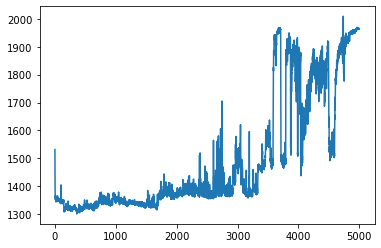

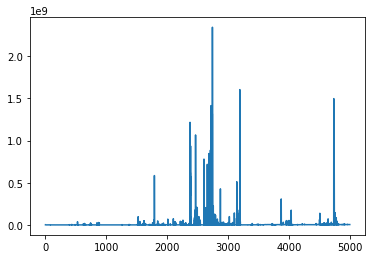

In [12]:
plt.plot(mae_history)
plt.show()
plt.plot(mse_history)
plt.show()